In [2]:
import anndata
import scanpy as sc

sc.logging.print_version_and_date()
sc.settings.verbosity = 0 

Running Scanpy 1.5.1, on 2020-07-29 21:02.


In [3]:
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, dpi_save=300, vector_friendly=True)
params = {'legend.fontsize': 8,
          'figure.figsize': (3, 3),
         'axes.labelsize':8,
         'axes.titlesize':8,
         'xtick.labelsize':8,
         'ytick.labelsize':8}
plt.rcParams.update(params)

In [4]:
write_folder = '/storage/groups/ml01/workspace/hananeh.aliee/projects/pancreas/write/'
adata_log = sc.read(write_folder+"adata_proc_log_indrop_dropseq.h5ad")
adata = sc.read(write_folder+"adata_proc_indrop_dropseq.h5ad")

In [5]:
adata_log.shape

(10955, 14498)

In [4]:
adata.var['highly_variable'] = adata_log.var['highly_variable']

In [10]:
adata.X = adata.X.todense()

In [26]:
low_cells = adata.obs['oncology'].value_counts()[adata.obs['oncology'].value_counts()<100].index
adata = adata[~adata.obs['oncology'].isin(low_cells)].copy()

In [11]:
import autogenes as ag
ngenes = 400
centroids = ag.init(adata,use_highly_variable=True,celltype_key='oncology')
ag.optimize(ngen=7000,seed=0,nfeatures=ngenes,mode='fixed',offspring_size=100)#,verbose=False)

gen	nevals	pareto	correlation 	distance          
0  	100   	5     	9.72 - 40.73	2519.99 - 58545.03
1  	100   	6     	9.64 - 28.88	4153.2 - 58545.03 
2  	100   	10    	9.64 - 25.61	4453.63 - 58545.03
3  	100   	9     	9.38 - 24.57	4453.63 - 58545.03
4  	100   	7     	9.32 - 24.57	4594.69 - 58545.03
5  	100   	9     	8.14 - 22.33	5329.78 - 58545.03
6  	100   	12    	8.13 - 22.33	5329.78 - 58545.03
7  	100   	16    	8.13 - 22.33	5329.78 - 58545.29
8  	100   	18    	8.09 - 22.33	5332.6 - 58545.29 
9  	100   	17    	7.82 - 22.31	6703.48 - 58545.32
10 	100   	17    	7.82 - 22.3 	6708.05 - 58545.32
11 	100   	13    	7.82 - 22.29	6715.94 - 58714.33
12 	100   	17    	7.81 - 20.07	6716.96 - 58714.33
13 	100   	19    	7.81 - 20.07	23788.13 - 58714.33
14 	100   	23    	7.81 - 20.07	23788.37 - 58763.06
15 	100   	19    	7.81 - 19.33	23807.54 - 58763.06
16 	100   	21    	7.81 - 19.33	23807.77 - 58763.06
17 	100   	22    	7.81 - 19.33	23807.77 - 58763.06
18 	100   	18    	7.81 - 19.33	23807.79 - 587

161	100   	37    	5.44 - 12.27	25870.96 - 62610.08
162	100   	38    	5.44 - 12.27	25870.96 - 62610.08
163	100   	38    	5.44 - 12.27	25870.64 - 62610.18
164	100   	41    	5.44 - 12.27	25872.0 - 62610.29 
165	100   	46    	5.44 - 12.27	25872.0 - 62611.44 
166	100   	41    	5.44 - 12.27	25872.0 - 62611.44 
167	100   	38    	5.43 - 12.27	25872.0 - 62611.44 
168	100   	39    	5.43 - 12.27	25872.0 - 62617.51 
169	100   	36    	5.43 - 12.27	25872.0 - 62617.51 
170	100   	36    	5.43 - 12.27	25872.0 - 62617.52 
171	100   	37    	5.43 - 12.25	25872.0 - 62617.52 
172	100   	34    	5.43 - 12.23	25872.0 - 62617.52 
173	100   	31    	5.43 - 12.23	25878.37 - 62617.67
174	100   	33    	5.36 - 12.23	25781.67 - 62617.67
175	100   	34    	5.36 - 12.23	25781.67 - 62617.67
176	100   	30    	5.36 - 12.23	25781.67 - 62617.67
177	100   	34    	5.35 - 12.23	25781.67 - 62617.67
178	100   	40    	5.35 - 12.23	25781.67 - 62617.67
179	100   	37    	5.25 - 12.23	25781.67 - 62617.67
180	100   	36    	5.25 - 12.23	

323	100   	45    	4.17 - 13.52	26106.54 - 81625.83
324	100   	44    	4.17 - 13.52	26106.54 - 81627.64
325	100   	39    	4.17 - 13.52	26106.01 - 81627.64
326	100   	41    	4.17 - 13.52	26106.01 - 81627.64
327	100   	43    	4.17 - 13.51	26088.91 - 81627.64
328	100   	48    	4.13 - 13.51	26056.78 - 81627.64
329	100   	41    	4.13 - 13.51	26056.78 - 81628.17
330	100   	39    	4.13 - 13.51	26056.78 - 81632.29
331	100   	40    	4.13 - 13.51	26056.78 - 81632.29
332	100   	41    	4.13 - 13.51	26056.78 - 81632.29
333	100   	38    	4.13 - 13.51	26056.78 - 81632.29
334	100   	34    	4.13 - 13.51	26056.78 - 81632.29
335	100   	29    	4.12 - 13.51	26056.78 - 81632.29
336	100   	32    	4.11 - 13.5 	30922.12 - 81632.29
337	100   	37    	4.11 - 13.5 	30922.12 - 81632.29
338	100   	34    	4.11 - 13.5 	30920.22 - 81632.29
339	100   	29    	4.11 - 13.5 	30922.6 - 81632.29 
340	100   	31    	4.11 - 13.5 	30922.6 - 81632.29 
341	100   	35    	4.11 - 13.5 	30922.6 - 81634.85 
342	100   	38    	4.11 - 13.5 	

484	100   	53    	3.35 - 12.8 	29190.83 - 82587.77
485	100   	50    	3.35 - 12.8 	30199.76 - 82587.77
486	100   	53    	3.33 - 12.8 	30199.82 - 82587.77
487	100   	49    	3.33 - 12.81	30199.82 - 82587.77
488	100   	55    	3.33 - 12.8 	30199.82 - 82587.77
489	100   	53    	3.33 - 12.8 	30199.82 - 82587.77
490	100   	56    	3.33 - 12.8 	30199.82 - 82587.77
491	100   	59    	3.33 - 12.8 	30191.04 - 82587.77
492	100   	54    	3.33 - 12.8 	30191.04 - 82587.77
493	100   	52    	3.33 - 12.8 	30191.04 - 82587.77
494	100   	53    	3.33 - 12.8 	30191.04 - 82587.77
495	100   	56    	3.33 - 12.8 	30191.04 - 82587.77
496	100   	55    	3.33 - 12.8 	30191.04 - 82587.77
497	100   	57    	3.3 - 12.8  	29464.04 - 82587.77
498	100   	62    	3.3 - 12.8  	29463.62 - 82587.77
499	100   	66    	3.3 - 12.8  	29463.62 - 82587.77
500	100   	67    	3.3 - 12.8  	29463.62 - 82587.77
501	100   	67    	3.3 - 12.8  	29463.62 - 82587.88
502	100   	70    	3.3 - 12.8  	29463.62 - 82587.88
503	100   	73    	3.3 - 12.8  	

645	100   	76    	2.9 - 12.34 	29041.31 - 82907.4 
646	100   	68    	2.9 - 12.34 	29041.31 - 82907.4 
647	100   	66    	2.9 - 12.33 	29041.31 - 82955.26
648	100   	68    	2.9 - 12.33 	29041.31 - 82955.26
649	100   	70    	2.9 - 12.33 	29041.31 - 82955.26
650	100   	75    	2.9 - 12.32 	29041.31 - 82955.35
651	100   	76    	2.9 - 12.32 	29041.31 - 82955.35
652	100   	72    	2.9 - 12.32 	29041.35 - 82955.35
653	100   	67    	2.9 - 12.32 	29041.35 - 82955.35
654	100   	71    	2.9 - 12.32 	29041.35 - 82963.73
655	100   	74    	2.9 - 12.32 	29050.48 - 82963.73
656	100   	74    	2.9 - 12.32 	29047.93 - 82963.73
657	100   	73    	2.9 - 12.32 	29047.93 - 82963.73
658	100   	71    	2.9 - 12.32 	29047.93 - 82963.73
659	100   	73    	2.9 - 12.29 	29047.93 - 82963.73
660	100   	77    	2.9 - 12.29 	29047.93 - 82963.8 
661	100   	77    	2.9 - 12.29 	29050.16 - 82963.8 
662	100   	75    	2.9 - 12.29 	29050.16 - 82963.8 
663	100   	77    	2.9 - 12.29 	29050.16 - 82963.8 
664	100   	77    	2.9 - 12.29 	

807	100   	131   	2.77 - 10.66	29022.71 - 83426.38
808	100   	132   	2.77 - 10.66	29022.71 - 83426.38
809	100   	138   	2.77 - 10.66	29022.71 - 83426.38
810	100   	140   	2.77 - 10.66	29022.71 - 83426.38
811	100   	146   	2.77 - 10.66	29022.71 - 83426.38
812	100   	149   	2.77 - 10.66	29022.71 - 83426.38
813	100   	149   	2.77 - 10.66	29022.71 - 83426.38
814	100   	150   	2.77 - 10.66	29022.71 - 83426.38
815	100   	154   	2.77 - 10.66	29022.71 - 83426.38
816	100   	153   	2.77 - 10.66	29022.71 - 83426.38
817	100   	143   	2.75 - 10.66	29028.68 - 83426.38
818	100   	139   	2.75 - 10.66	29028.68 - 83426.38
819	100   	128   	2.75 - 10.66	29028.68 - 83426.38
820	100   	130   	2.75 - 10.66	29028.94 - 83426.38
821	100   	128   	2.75 - 10.66	29028.94 - 83426.38
822	100   	118   	2.75 - 10.66	29028.94 - 83426.38
823	100   	122   	2.75 - 10.66	29028.94 - 83426.38
824	100   	122   	2.75 - 10.66	29028.94 - 83426.38
825	100   	119   	2.75 - 10.66	29025.06 - 83426.38
826	100   	124   	2.75 - 10.66	

969	100   	191   	2.72 - 10.61	28999.78 - 83435.92
970	100   	184   	2.72 - 10.53	28999.78 - 83664.58
971	100   	187   	2.72 - 10.53	28999.78 - 83664.58
972	100   	191   	2.72 - 10.53	28999.78 - 83664.58
973	100   	187   	2.72 - 10.53	28999.78 - 83664.58
974	100   	189   	2.72 - 10.53	28999.78 - 83664.58
975	100   	193   	2.72 - 10.53	28999.78 - 83664.58
976	100   	187   	2.72 - 10.53	28999.78 - 83664.58
977	100   	193   	2.72 - 10.53	28999.78 - 83664.65
978	100   	197   	2.72 - 10.53	28999.78 - 83664.65
979	100   	190   	2.72 - 10.53	28999.78 - 83664.65
980	100   	193   	2.72 - 10.53	28999.78 - 83664.65
981	100   	197   	2.72 - 10.53	28999.86 - 83664.65
982	100   	197   	2.72 - 10.53	28999.86 - 83664.65
983	100   	199   	2.72 - 10.53	28999.86 - 83664.65
984	100   	198   	2.72 - 10.53	28999.86 - 83664.65
985	100   	189   	2.72 - 10.53	28999.86 - 83664.65
986	100   	188   	2.72 - 10.53	28999.86 - 83664.65
987	100   	190   	2.72 - 10.53	28999.86 - 83664.65
988	100   	193   	2.72 - 10.53	

1128	100   	206   	2.66 - 10.49	29091.89 - 83728.14
1129	100   	212   	2.66 - 10.49	29091.89 - 83728.14
1130	100   	209   	2.66 - 10.49	29091.89 - 83728.14
1131	100   	212   	2.66 - 10.49	29091.89 - 83728.14
1132	100   	208   	2.66 - 10.49	29091.89 - 83728.15
1133	100   	204   	2.66 - 10.49	29091.89 - 83728.15
1134	100   	199   	2.66 - 10.49	29091.89 - 83728.15
1135	100   	198   	2.66 - 10.49	29091.89 - 83728.15
1136	100   	200   	2.66 - 10.49	29091.89 - 83728.15
1137	100   	201   	2.66 - 10.49	29091.89 - 83728.15
1138	100   	196   	2.66 - 10.49	29091.89 - 83728.15
1139	100   	197   	2.66 - 10.49	29091.89 - 83728.15
1140	100   	203   	2.66 - 10.49	29091.89 - 83728.15
1141	100   	203   	2.66 - 10.49	29091.89 - 83728.15
1142	100   	204   	2.66 - 10.49	29091.89 - 83728.15
1143	100   	208   	2.66 - 10.49	29091.89 - 83728.15
1144	100   	196   	2.65 - 10.49	29099.08 - 83728.25
1145	100   	197   	2.65 - 10.49	29099.08 - 83728.25
1146	100   	204   	2.65 - 10.49	29099.08 - 83728.25
1147	100   	

1286	100   	207   	2.63 - 10.34	29113.42 - 84705.44
1287	100   	212   	2.63 - 10.34	29113.42 - 84705.44
1288	100   	218   	2.63 - 10.34	29113.42 - 84705.44
1289	100   	210   	2.63 - 10.12	29113.42 - 84861.52
1290	100   	212   	2.63 - 10.12	29113.42 - 84861.52
1291	100   	212   	2.63 - 10.12	29113.42 - 84861.52
1292	100   	210   	2.63 - 10.12	29113.71 - 84861.52
1293	100   	208   	2.63 - 10.12	29113.67 - 84861.52
1294	100   	209   	2.63 - 10.12	29113.67 - 84861.52
1295	100   	209   	2.63 - 10.12	29113.67 - 84861.52
1296	100   	205   	2.63 - 12.05	29113.67 - 85461.18
1297	100   	210   	2.63 - 12.05	29113.67 - 85461.18
1298	100   	210   	2.63 - 12.05	29113.67 - 85461.18
1299	100   	208   	2.63 - 12.05	29113.67 - 85461.18
1300	100   	216   	2.63 - 12.05	29113.67 - 85461.18
1301	100   	222   	2.63 - 12.05	29113.67 - 85461.18
1302	100   	216   	2.63 - 12.05	29113.67 - 85461.18
1303	100   	217   	2.63 - 12.05	29113.67 - 85461.18
1304	100   	218   	2.63 - 12.05	29113.67 - 85461.18
1305	100   	

1444	100   	229   	2.61 - 12.03	28907.65 - 85531.68
1445	100   	234   	2.61 - 12.03	28907.65 - 85531.68
1446	100   	241   	2.61 - 12.03	28907.65 - 85531.68
1447	100   	236   	2.61 - 12.03	28907.65 - 85531.68
1448	100   	236   	2.61 - 12.03	28907.65 - 85531.68
1449	100   	231   	2.61 - 12.03	28907.65 - 85531.68
1450	100   	237   	2.61 - 12.03	28907.65 - 85531.68
1451	100   	238   	2.61 - 12.03	28907.65 - 85531.68
1452	100   	241   	2.61 - 12.03	28907.65 - 85531.68
1453	100   	245   	2.61 - 12.03	28907.65 - 85531.72
1454	100   	248   	2.61 - 12.03	28907.66 - 85531.72
1455	100   	249   	2.61 - 12.03	28907.66 - 85531.72
1456	100   	242   	2.61 - 12.03	28907.66 - 85531.72
1457	100   	249   	2.61 - 12.03	28907.66 - 85531.72
1458	100   	248   	2.61 - 12.03	28907.66 - 85531.72
1459	100   	248   	2.61 - 12.03	28907.66 - 85531.72
1460	100   	253   	2.61 - 12.03	28907.66 - 85531.72
1461	100   	244   	2.61 - 12.03	28907.66 - 85531.72
1462	100   	244   	2.61 - 12.03	28907.62 - 85561.11
1463	100   	

1602	100   	243   	2.59 - 11.98	28909.77 - 85621.91
1603	100   	246   	2.59 - 11.98	28909.77 - 85621.91
1604	100   	245   	2.59 - 11.98	28909.77 - 85621.91
1605	100   	244   	2.59 - 11.98	28909.77 - 85621.91
1606	100   	252   	2.59 - 11.98	28909.77 - 85621.93
1607	100   	257   	2.59 - 11.98	28909.77 - 85621.93
1608	100   	259   	2.59 - 11.98	28909.77 - 85621.93
1609	100   	258   	2.59 - 11.98	28909.77 - 85621.93
1610	100   	261   	2.59 - 11.98	28909.77 - 85621.93
1611	100   	261   	2.59 - 11.98	28909.77 - 85621.93
1612	100   	264   	2.59 - 11.98	28909.77 - 85621.93
1613	100   	266   	2.59 - 11.98	28909.77 - 85621.93
1614	100   	264   	2.59 - 11.97	28909.77 - 85625.67
1615	100   	264   	2.59 - 11.97	28909.77 - 85625.68
1616	100   	261   	2.59 - 11.97	28909.77 - 85625.68
1617	100   	256   	2.59 - 11.97	28909.77 - 85625.68
1618	100   	262   	2.59 - 11.97	28909.77 - 85625.68
1619	100   	265   	2.59 - 11.97	28909.77 - 85625.68
1620	100   	270   	2.59 - 11.96	28909.77 - 85625.94
1621	100   	

1760	100   	271   	2.58 - 11.95	28901.42 - 85628.38
1761	100   	273   	2.58 - 11.95	28901.42 - 85628.38
1762	100   	275   	2.58 - 11.95	28901.42 - 85628.38
1763	100   	278   	2.58 - 11.95	28901.42 - 85628.38
1764	100   	280   	2.58 - 11.95	28901.42 - 85628.38
1765	100   	278   	2.58 - 11.95	28901.42 - 85628.38
1766	100   	276   	2.58 - 11.95	28901.42 - 85628.38
1767	100   	284   	2.58 - 11.95	28901.44 - 85628.38
1768	100   	284   	2.58 - 11.95	28901.44 - 85628.38
1769	100   	285   	2.58 - 11.95	28901.44 - 85628.38
1770	100   	286   	2.58 - 11.95	28901.44 - 85628.38
1771	100   	288   	2.58 - 11.95	28901.44 - 85628.38
1772	100   	281   	2.58 - 11.95	28901.44 - 85628.38
1773	100   	283   	2.58 - 11.95	28901.44 - 85628.38
1774	100   	277   	2.58 - 11.95	28901.44 - 85628.38
1775	100   	277   	2.58 - 11.95	28901.44 - 85628.38
1776	100   	278   	2.58 - 11.95	28901.44 - 85628.38
1777	100   	286   	2.58 - 11.95	28901.44 - 85628.38
1778	100   	283   	2.58 - 11.95	28901.44 - 85628.38
1779	100   	

1918	100   	283   	2.57 - 11.93	28875.15 - 85640.62
1919	100   	281   	2.57 - 11.92	28875.15 - 85640.68
1920	100   	284   	2.57 - 11.92	28875.15 - 85640.68
1921	100   	285   	2.57 - 11.92	28875.15 - 85640.68
1922	100   	279   	2.57 - 11.92	28875.15 - 85640.68
1923	100   	281   	2.57 - 11.92	28875.15 - 85640.68
1924	100   	278   	2.57 - 11.92	28875.15 - 85640.68
1925	100   	279   	2.57 - 11.92	28875.15 - 85640.68
1926	100   	281   	2.57 - 11.92	28875.15 - 85640.68
1927	100   	283   	2.57 - 11.92	28875.15 - 85640.83
1928	100   	287   	2.57 - 11.92	28875.15 - 85640.83
1929	100   	290   	2.57 - 11.92	28875.15 - 85640.83
1930	100   	295   	2.57 - 11.92	28875.15 - 85640.83
1931	100   	296   	2.57 - 11.92	28875.15 - 85640.83
1932	100   	300   	2.57 - 11.92	28875.15 - 85640.83
1933	100   	299   	2.57 - 11.92	28875.15 - 85640.83
1934	100   	292   	2.57 - 11.92	28875.15 - 85640.83
1935	100   	293   	2.57 - 11.92	28875.15 - 85640.83
1936	100   	291   	2.57 - 11.92	28875.15 - 85640.83
1937	100   	

2076	100   	307   	2.57 - 11.91	29227.76 - 85643.32
2077	100   	307   	2.57 - 11.91	29227.76 - 85643.32
2078	100   	312   	2.57 - 11.91	29227.76 - 85643.32
2079	100   	317   	2.57 - 11.91	29227.76 - 85643.32
2080	100   	321   	2.57 - 11.91	29227.76 - 85643.32
2081	100   	325   	2.57 - 11.91	29227.76 - 85643.32
2082	100   	326   	2.57 - 11.91	29227.76 - 85643.32
2083	100   	331   	2.57 - 11.91	29227.76 - 85643.32
2084	100   	330   	2.57 - 11.91	29227.76 - 85643.32
2085	100   	329   	2.57 - 11.91	29227.76 - 85643.32
2086	100   	327   	2.57 - 11.91	29227.76 - 85643.32
2087	100   	323   	2.57 - 11.91	29227.76 - 85643.32
2088	100   	320   	2.57 - 11.91	29227.76 - 85643.32
2089	100   	320   	2.57 - 11.91	29227.76 - 85643.32
2090	100   	321   	2.57 - 11.91	29227.76 - 85643.32
2091	100   	324   	2.57 - 11.91	29227.76 - 85643.32
2092	100   	327   	2.57 - 11.91	29227.76 - 85643.32
2093	100   	327   	2.57 - 11.91	29227.76 - 85643.32
2094	100   	315   	2.57 - 11.91	29227.76 - 85643.32
2095	100   	

2234	100   	322   	2.53 - 11.83	28889.56 - 85697.26
2235	100   	314   	2.53 - 11.83	28889.56 - 85697.26
2236	100   	315   	2.53 - 11.83	28889.56 - 85697.26
2237	100   	314   	2.53 - 11.83	28889.56 - 85697.26
2238	100   	313   	2.53 - 11.83	28889.56 - 85697.26
2239	100   	319   	2.53 - 11.83	28889.56 - 85697.26
2240	100   	324   	2.53 - 11.83	28889.56 - 85698.6 
2241	100   	324   	2.53 - 11.83	28889.56 - 85698.6 
2242	100   	324   	2.53 - 11.83	28889.56 - 85698.6 
2243	100   	330   	2.53 - 11.83	28889.56 - 85698.6 
2244	100   	333   	2.53 - 11.83	28889.56 - 85698.6 
2245	100   	334   	2.53 - 11.83	28889.56 - 85698.6 
2246	100   	335   	2.53 - 11.83	28889.56 - 85698.6 
2247	100   	336   	2.53 - 11.83	28889.56 - 85698.6 
2248	100   	337   	2.53 - 11.83	28889.56 - 85698.6 
2249	100   	337   	2.53 - 11.83	28889.56 - 85698.6 
2250	100   	337   	2.53 - 11.83	28889.56 - 85698.6 
2251	100   	336   	2.53 - 11.83	28889.56 - 85698.6 
2252	100   	336   	2.53 - 11.83	28889.56 - 85698.6 
2253	100   	

2392	100   	354   	2.52 - 11.79	28885.2 - 85879.36 
2393	100   	356   	2.52 - 11.79	28885.2 - 85879.36 
2394	100   	360   	2.52 - 11.79	28885.2 - 85879.36 
2395	100   	361   	2.52 - 11.79	28885.2 - 85879.36 
2396	100   	360   	2.52 - 11.79	28885.2 - 85879.36 
2397	100   	363   	2.52 - 11.79	28885.2 - 85879.36 
2398	100   	366   	2.52 - 11.79	28885.2 - 85879.36 
2399	100   	371   	2.52 - 11.79	28885.2 - 85879.36 
2400	100   	375   	2.52 - 11.79	28885.2 - 85879.36 
2401	100   	372   	2.52 - 11.79	28885.2 - 85879.42 
2402	100   	373   	2.52 - 11.79	28885.2 - 85879.42 
2403	100   	361   	2.52 - 11.79	28885.2 - 85879.42 
2404	100   	365   	2.52 - 11.79	28885.2 - 85879.42 
2405	100   	368   	2.52 - 11.79	28885.2 - 85879.42 
2406	100   	369   	2.52 - 11.79	28885.2 - 85879.71 
2407	100   	372   	2.52 - 11.79	28885.2 - 85879.78 
2408	100   	371   	2.52 - 11.79	28885.2 - 85879.78 
2409	100   	368   	2.52 - 11.79	28885.2 - 85879.78 
2410	100   	372   	2.52 - 11.79	28885.2 - 85879.78 
2411	100   	

2550	100   	301   	2.51 - 11.1 	28877.25 - 86054.38
2551	100   	306   	2.51 - 11.1 	28877.25 - 86054.38
2552	100   	302   	2.51 - 11.1 	28877.25 - 86054.38
2553	100   	302   	2.51 - 11.1 	28877.25 - 86054.38
2554	100   	306   	2.51 - 11.1 	28877.25 - 86054.38
2555	100   	305   	2.51 - 11.1 	28877.25 - 86054.38
2556	100   	306   	2.51 - 11.1 	28877.25 - 86054.38
2557	100   	300   	2.51 - 11.1 	28877.25 - 86054.38
2558	100   	306   	2.51 - 11.1 	28877.25 - 86054.38
2559	100   	304   	2.51 - 11.1 	28877.25 - 86054.39
2560	100   	303   	2.51 - 11.1 	28877.25 - 86054.45
2561	100   	306   	2.51 - 11.1 	28877.25 - 86054.45
2562	100   	308   	2.51 - 11.1 	28877.25 - 86054.45
2563	100   	309   	2.51 - 11.1 	28877.48 - 86054.45
2564	100   	309   	2.51 - 11.1 	28877.48 - 86054.45
2565	100   	308   	2.51 - 11.1 	28877.48 - 86054.45
2566	100   	310   	2.51 - 11.1 	28877.48 - 86054.45
2567	100   	313   	2.51 - 11.1 	28877.48 - 86054.45
2568	100   	315   	2.51 - 11.1 	28877.48 - 86054.45
2569	100   	

2708	100   	396   	2.51 - 11.09	28875.09 - 86079.27
2709	100   	386   	2.51 - 11.09	28875.09 - 86079.27
2710	100   	380   	2.51 - 11.09	28875.09 - 86079.27
2711	100   	380   	2.51 - 11.09	28875.09 - 86079.27
2712	100   	380   	2.51 - 11.09	28875.09 - 86079.27
2713	100   	375   	2.51 - 11.09	28875.09 - 86079.27
2714	100   	378   	2.51 - 11.09	28875.09 - 86079.27
2715	100   	379   	2.51 - 11.09	28874.97 - 86079.27
2716	100   	378   	2.51 - 11.09	28874.97 - 86079.27
2717	100   	379   	2.5 - 11.09 	28875.59 - 86079.27
2718	100   	386   	2.5 - 11.09 	28875.59 - 86079.27
2719	100   	386   	2.5 - 11.09 	28875.59 - 86079.27
2720	100   	379   	2.5 - 11.09 	28875.59 - 86079.27
2721	100   	380   	2.5 - 11.09 	28875.59 - 86079.27
2722	100   	379   	2.5 - 11.09 	28875.59 - 86079.27
2723	100   	376   	2.5 - 11.09 	28875.59 - 86079.27
2724	100   	379   	2.5 - 11.09 	28875.59 - 86079.27
2725	100   	375   	2.5 - 11.09 	28876.59 - 86079.27
2726	100   	375   	2.5 - 11.09 	28876.59 - 86079.27
2727	100   	

2866	100   	410   	2.48 - 11.04	28879.9 - 86422.23 
2867	100   	407   	2.48 - 11.04	28879.9 - 86422.24 
2868	100   	408   	2.48 - 11.04	28879.9 - 86422.24 
2869	100   	408   	2.48 - 11.04	28879.9 - 86422.24 
2870	100   	406   	2.48 - 11.04	28879.9 - 86422.24 
2871	100   	394   	2.48 - 11.04	28879.9 - 86422.24 
2872	100   	394   	2.48 - 11.04	28879.9 - 86422.24 
2873	100   	378   	2.48 - 11.04	28879.9 - 86422.24 
2874	100   	386   	2.48 - 11.04	28879.9 - 86422.24 
2875	100   	383   	2.48 - 11.04	28879.83 - 86422.24
2876	100   	378   	2.48 - 11.04	28879.89 - 86422.24
2877	100   	360   	2.48 - 11.04	28879.89 - 86422.24
2878	100   	358   	2.48 - 11.04	28879.89 - 86422.24
2879	100   	360   	2.48 - 11.04	28879.89 - 86422.24
2880	100   	364   	2.48 - 11.04	28879.89 - 86422.24
2881	100   	366   	2.48 - 11.04	28879.89 - 86422.24
2882	100   	367   	2.48 - 11.04	28879.89 - 86422.24
2883	100   	371   	2.48 - 11.04	28879.89 - 86422.24
2884	100   	367   	2.48 - 11.04	28879.89 - 86422.24
2885	100   	

3024	100   	383   	2.48 - 11.05	29577.39 - 86524.51
3025	100   	385   	2.48 - 11.05	29577.39 - 86524.51
3026	100   	382   	2.48 - 11.05	29577.39 - 86524.51
3027	100   	382   	2.48 - 11.05	29577.39 - 86524.51
3028	100   	386   	2.48 - 11.05	29577.39 - 86524.51
3029	100   	377   	2.48 - 11.05	29574.14 - 86524.51
3030	100   	375   	2.48 - 11.05	29574.14 - 86524.51
3031	100   	381   	2.48 - 11.05	29574.14 - 86524.51
3032	100   	385   	2.48 - 11.05	29574.14 - 86524.51
3033	100   	384   	2.48 - 11.05	29574.14 - 86524.51
3034	100   	386   	2.48 - 11.05	29574.14 - 86524.51
3035	100   	388   	2.48 - 11.05	29574.14 - 86524.64
3036	100   	386   	2.48 - 11.05	29574.14 - 86524.64
3037	100   	357   	2.48 - 11.05	29574.14 - 86524.64
3038	100   	360   	2.47 - 11.05	29574.18 - 86524.64
3039	100   	362   	2.47 - 11.05	29574.18 - 86524.64
3040	100   	368   	2.47 - 11.05	29574.18 - 86524.64
3041	100   	368   	2.47 - 11.05	29574.18 - 86524.64
3042	100   	353   	2.47 - 11.05	29574.18 - 86524.64
3043	100   	

3182	100   	373   	2.47 - 11.05	29574.87 - 86538.95
3183	100   	372   	2.47 - 11.05	29574.87 - 86538.95
3184	100   	375   	2.47 - 11.05	29574.87 - 86538.95
3185	100   	376   	2.47 - 11.05	29574.87 - 86538.95
3186	100   	379   	2.47 - 11.05	29574.87 - 86538.95
3187	100   	364   	2.47 - 11.05	29574.87 - 86538.95
3188	100   	366   	2.47 - 11.05	29574.87 - 86538.95
3189	100   	370   	2.47 - 11.05	29574.87 - 86538.95
3190	100   	369   	2.47 - 11.05	29574.87 - 86538.95
3191	100   	369   	2.47 - 11.05	29574.87 - 86538.95
3192	100   	372   	2.47 - 11.05	29574.87 - 86538.95
3193	100   	374   	2.47 - 11.05	29574.87 - 86538.95
3194	100   	371   	2.47 - 11.05	29574.87 - 86538.95
3195	100   	368   	2.47 - 11.05	29574.87 - 86538.95
3196	100   	367   	2.47 - 11.05	29574.87 - 86538.95
3197	100   	367   	2.47 - 11.05	29574.87 - 86538.95
3198	100   	370   	2.47 - 11.05	29574.87 - 86538.95
3199	100   	368   	2.47 - 11.05	29574.87 - 86538.95
3200	100   	368   	2.47 - 11.05	29574.87 - 86538.95
3201	100   	

3340	100   	413   	2.43 - 11.0 	28885.66 - 86552.18
3341	100   	414   	2.43 - 11.0 	28885.66 - 86552.18
3342	100   	415   	2.43 - 11.01	28885.66 - 86557.35
3343	100   	418   	2.43 - 11.01	28885.66 - 86557.35
3344	100   	422   	2.43 - 11.01	28885.66 - 86557.35
3345	100   	422   	2.43 - 11.01	28885.66 - 86557.35
3346	100   	423   	2.43 - 11.01	28885.66 - 86557.35
3347	100   	424   	2.43 - 11.01	28885.66 - 86557.35
3348	100   	428   	2.43 - 11.01	28885.66 - 86557.35
3349	100   	429   	2.43 - 11.01	28885.66 - 86557.35
3350	100   	433   	2.43 - 11.01	28885.66 - 86557.35
3351	100   	435   	2.43 - 11.01	28885.66 - 86557.35
3352	100   	433   	2.43 - 11.01	28885.66 - 86557.35
3353	100   	435   	2.43 - 11.01	28885.66 - 86557.35
3354	100   	437   	2.43 - 11.01	28885.66 - 86557.35
3355	100   	439   	2.43 - 11.01	28885.66 - 86557.35
3356	100   	437   	2.43 - 11.01	28885.66 - 86557.35
3357	100   	431   	2.43 - 11.01	28885.66 - 86557.35
3358	100   	431   	2.43 - 11.01	28885.66 - 86557.35
3359	100   	

3499	100   	436   	2.42 - 10.95	28887.12 - 86596.82
3500	100   	431   	2.42 - 10.95	28887.12 - 86596.82
3501	100   	437   	2.42 - 10.95	28887.12 - 86596.82
3502	100   	441   	2.42 - 10.95	28887.12 - 86596.82
3503	100   	440   	2.42 - 10.95	28887.12 - 86596.82
3504	100   	437   	2.42 - 10.95	28887.12 - 86596.82
3505	100   	440   	2.42 - 10.95	28887.12 - 86596.82
3506	100   	434   	2.42 - 10.95	28887.12 - 86596.83
3507	100   	432   	2.42 - 10.95	28887.12 - 86596.83
3508	100   	432   	2.42 - 10.95	28887.12 - 86596.83
3509	100   	427   	2.42 - 10.95	28887.14 - 86596.83
3510	100   	426   	2.42 - 10.95	28887.14 - 86596.9 
3511	100   	429   	2.42 - 10.95	28887.14 - 86596.9 
3512	100   	431   	2.42 - 10.95	28887.14 - 86596.9 
3513	100   	432   	2.42 - 10.95	28887.14 - 86596.9 
3514	100   	435   	2.42 - 10.95	28887.14 - 86596.9 
3515	100   	433   	2.42 - 10.95	28887.14 - 86596.9 
3516	100   	437   	2.42 - 10.95	28887.14 - 86596.9 
3517	100   	436   	2.42 - 10.95	28887.14 - 86596.9 
3518	100   	

3657	100   	445   	2.41 - 10.95	28880.23 - 86599.58
3658	100   	445   	2.41 - 10.93	28880.23 - 86605.08
3659	100   	448   	2.41 - 10.93	28880.23 - 86605.08
3660	100   	449   	2.41 - 10.93	28880.23 - 86605.08
3661	100   	446   	2.41 - 10.93	28880.23 - 86605.08
3662	100   	449   	2.41 - 10.93	28880.23 - 86605.08
3663	100   	452   	2.41 - 10.93	28880.23 - 86605.08
3664	100   	450   	2.41 - 10.93	28880.23 - 86605.08
3665	100   	451   	2.41 - 10.93	28880.23 - 86605.08
3666	100   	448   	2.41 - 10.93	28880.23 - 86605.08
3667	100   	452   	2.41 - 10.93	28880.23 - 86605.08
3668	100   	454   	2.41 - 10.92	28880.23 - 86606.2 
3669	100   	449   	2.41 - 10.92	28880.23 - 86606.2 
3670	100   	450   	2.41 - 10.92	28880.23 - 86606.2 
3671	100   	438   	2.41 - 10.92	28880.23 - 86606.2 
3672	100   	437   	2.41 - 10.92	28880.23 - 86606.2 
3673	100   	441   	2.41 - 10.92	28880.23 - 86606.2 
3674	100   	442   	2.41 - 10.92	28880.21 - 86606.3 
3675	100   	443   	2.41 - 10.92	28880.21 - 86606.3 
3676	100   	

3816	100   	545   	2.4 - 10.9  	28862.23 - 86618.26
3817	100   	548   	2.4 - 10.9  	28862.23 - 86618.26
3818	100   	541   	2.4 - 10.89 	28862.23 - 86618.4 
3819	100   	542   	2.4 - 10.89 	28862.23 - 86618.4 
3820	100   	544   	2.4 - 10.89 	28862.23 - 86618.4 
3821	100   	544   	2.4 - 10.89 	28862.23 - 86618.4 
3822	100   	547   	2.4 - 10.89 	28862.23 - 86618.4 
3823	100   	548   	2.4 - 10.89 	28862.23 - 86618.4 
3824	100   	547   	2.4 - 10.89 	28862.23 - 86618.4 
3825	100   	548   	2.4 - 10.89 	28862.23 - 86618.95
3826	100   	545   	2.4 - 10.89 	28862.23 - 86618.95
3827	100   	540   	2.4 - 10.89 	28862.23 - 86618.95
3828	100   	544   	2.4 - 10.89 	28862.23 - 86618.95
3829	100   	546   	2.4 - 10.89 	28862.23 - 86618.95
3830	100   	546   	2.4 - 10.89 	28862.23 - 86618.95
3831	100   	538   	2.4 - 10.89 	28862.23 - 86618.95
3832	100   	531   	2.4 - 10.89 	28862.23 - 86618.95
3833	100   	535   	2.4 - 10.89 	28862.23 - 86618.95
3834	100   	538   	2.4 - 10.89 	28862.23 - 86618.95
3835	100   	

3975	100   	523   	2.39 - 10.13	28846.59 - 87074.0 
3976	100   	525   	2.39 - 10.13	28846.59 - 87074.0 
3977	100   	513   	2.38 - 10.13	28860.68 - 87074.0 
3978	100   	510   	2.38 - 10.13	28860.68 - 87074.0 
3979	100   	510   	2.38 - 10.13	28860.68 - 87074.0 
3980	100   	510   	2.38 - 10.13	28860.68 - 87074.0 
3981	100   	514   	2.38 - 10.13	28860.68 - 87074.0 
3982	100   	516   	2.38 - 10.13	28860.68 - 87074.0 
3983	100   	516   	2.38 - 10.13	28860.68 - 87074.0 
3984	100   	514   	2.38 - 10.13	28860.68 - 87074.0 
3985	100   	516   	2.38 - 10.13	28860.68 - 87074.0 
3986	100   	513   	2.38 - 10.13	28860.68 - 87074.0 
3987	100   	510   	2.38 - 10.13	28860.68 - 87074.0 
3988	100   	513   	2.38 - 10.13	28860.68 - 87074.0 
3989	100   	517   	2.38 - 10.13	28860.68 - 87074.0 
3990	100   	517   	2.38 - 10.13	28860.68 - 87074.0 
3991	100   	515   	2.38 - 10.13	28860.68 - 87074.0 
3992	100   	502   	2.38 - 10.13	28860.68 - 87074.0 
3993	100   	500   	2.38 - 10.13	28860.68 - 87074.0 
3994	100   	

4133	100   	488   	2.37 - 10.12	28878.54 - 87074.73
4134	100   	488   	2.37 - 10.12	28878.54 - 87074.73
4135	100   	491   	2.37 - 10.12	28878.54 - 87074.73
4136	100   	491   	2.37 - 10.12	28878.54 - 87074.73
4137	100   	482   	2.37 - 10.12	28878.54 - 87074.73
4138	100   	483   	2.37 - 10.12	28878.54 - 87074.73
4139	100   	477   	2.37 - 10.12	28878.54 - 87074.73
4140	100   	481   	2.37 - 10.12	28878.54 - 87074.73
4141	100   	481   	2.37 - 10.12	28878.54 - 87074.73
4142	100   	483   	2.37 - 10.12	28878.54 - 87074.73
4143	100   	485   	2.37 - 10.12	28878.48 - 87074.73
4144	100   	488   	2.37 - 10.12	28878.48 - 87074.73
4145	100   	489   	2.37 - 10.12	28878.48 - 87074.73
4146	100   	493   	2.37 - 10.12	28878.48 - 87074.73
4147	100   	495   	2.37 - 10.12	28878.48 - 87074.73
4148	100   	498   	2.37 - 10.12	28878.48 - 87074.73
4149	100   	496   	2.37 - 10.12	28878.48 - 87074.73
4150	100   	498   	2.37 - 10.12	28878.48 - 87074.73
4151	100   	499   	2.37 - 10.12	28878.48 - 87074.73
4152	100   	

4292	100   	539   	2.37 - 10.12	28878.05 - 87074.94
4293	100   	544   	2.37 - 10.12	28878.05 - 87074.94
4294	100   	547   	2.37 - 10.12	28878.05 - 87074.94
4295	100   	545   	2.37 - 10.11	28878.05 - 87075.01
4296	100   	545   	2.37 - 10.11	28877.92 - 87075.01
4297	100   	547   	2.37 - 10.11	28877.92 - 87075.01
4298	100   	551   	2.37 - 10.11	28877.92 - 87075.01
4299	100   	552   	2.37 - 10.11	28877.92 - 87075.01
4300	100   	550   	2.37 - 10.11	28877.92 - 87075.01
4301	100   	550   	2.37 - 10.11	28877.92 - 87075.01
4302	100   	550   	2.37 - 10.11	28877.92 - 87075.01
4303	100   	544   	2.37 - 10.11	28877.92 - 87075.01
4304	100   	545   	2.37 - 10.11	28877.92 - 87075.49
4305	100   	545   	2.37 - 10.11	28877.92 - 87075.49
4306	100   	535   	2.37 - 10.11	28877.92 - 87075.49
4307	100   	541   	2.37 - 10.11	28877.92 - 87075.49
4308	100   	544   	2.37 - 10.11	28877.92 - 87075.49
4309	100   	545   	2.37 - 10.11	28877.92 - 87075.49
4310	100   	541   	2.37 - 10.11	28877.92 - 87075.49
4311	100   	

4450	100   	554   	2.37 - 10.11	28878.59 - 87077.88
4451	100   	555   	2.37 - 10.11	28878.59 - 87077.88
4452	100   	553   	2.37 - 10.11	28878.59 - 87077.88
4453	100   	551   	2.37 - 10.11	28878.59 - 87077.88
4454	100   	550   	2.37 - 10.11	28878.59 - 87077.88
4455	100   	552   	2.37 - 10.11	28878.59 - 87077.88
4456	100   	553   	2.37 - 10.11	28878.59 - 87077.88
4457	100   	557   	2.37 - 10.11	28878.59 - 87077.88
4458	100   	557   	2.37 - 10.11	28878.59 - 87077.88
4459	100   	560   	2.37 - 10.11	28878.59 - 87077.88
4460	100   	561   	2.37 - 10.11	28878.59 - 87077.88
4461	100   	560   	2.37 - 9.94 	28878.59 - 87139.79
4462	100   	563   	2.37 - 9.94 	28878.59 - 87139.79
4463	100   	566   	2.37 - 9.94 	28877.66 - 87139.79
4464	100   	562   	2.37 - 9.94 	28877.66 - 87139.79
4465	100   	561   	2.37 - 9.94 	28877.66 - 87139.79
4466	100   	562   	2.37 - 9.94 	28877.66 - 87139.79
4467	100   	561   	2.37 - 9.94 	28877.66 - 87139.79
4468	100   	557   	2.37 - 9.94 	28877.66 - 87139.79
4469	100   	

4608	100   	538   	2.36 - 9.88 	28888.65 - 87151.7 
4609	100   	536   	2.36 - 9.88 	28888.65 - 87151.7 
4610	100   	536   	2.36 - 9.88 	28888.65 - 87151.7 
4611	100   	534   	2.36 - 9.88 	28888.65 - 87151.7 
4612	100   	537   	2.36 - 9.88 	28888.65 - 87151.7 
4613	100   	540   	2.36 - 9.88 	28888.65 - 87151.7 
4614	100   	541   	2.36 - 9.88 	28888.65 - 87151.71
4615	100   	541   	2.36 - 9.88 	28888.65 - 87151.71
4616	100   	539   	2.36 - 9.88 	28888.65 - 87151.71
4617	100   	541   	2.36 - 9.88 	28888.65 - 87151.71
4618	100   	537   	2.36 - 9.88 	28888.65 - 87151.71
4619	100   	531   	2.36 - 9.88 	28888.65 - 87151.75
4620	100   	526   	2.36 - 9.88 	28888.65 - 87151.75
4621	100   	532   	2.36 - 9.88 	28888.65 - 87151.75
4622	100   	531   	2.36 - 9.88 	28888.65 - 87151.75
4623	100   	533   	2.36 - 9.88 	28888.65 - 87151.75
4624	100   	535   	2.36 - 9.88 	28888.65 - 87151.75
4625	100   	537   	2.36 - 9.88 	28888.65 - 87151.75
4626	100   	538   	2.36 - 9.88 	28888.65 - 87151.75
4627	100   	

4766	100   	605   	2.35 - 9.85 	28881.16 - 87159.71
4767	100   	606   	2.35 - 9.85 	28881.16 - 87159.77
4768	100   	602   	2.35 - 9.85 	28881.16 - 87159.77
4769	100   	600   	2.35 - 9.85 	28882.64 - 87159.77
4770	100   	602   	2.35 - 9.85 	28882.64 - 87159.77
4771	100   	602   	2.35 - 9.85 	28882.64 - 87159.77
4772	100   	603   	2.35 - 9.85 	28882.64 - 87159.77
4773	100   	605   	2.35 - 9.85 	28882.64 - 87159.77
4774	100   	608   	2.35 - 9.85 	28882.64 - 87159.77
4775	100   	609   	2.35 - 9.85 	28882.64 - 87159.77
4776	100   	607   	2.35 - 9.85 	28882.64 - 87159.77
4777	100   	607   	2.35 - 9.85 	28882.64 - 87159.77
4778	100   	608   	2.35 - 9.85 	28882.64 - 87159.77
4779	100   	612   	2.35 - 9.85 	28882.64 - 87159.77
4780	100   	615   	2.35 - 9.85 	28882.64 - 87159.77
4781	100   	613   	2.35 - 9.85 	28882.64 - 87159.77
4782	100   	616   	2.35 - 9.85 	28882.64 - 87159.77
4783	100   	617   	2.35 - 9.85 	28882.64 - 87159.77
4784	100   	617   	2.35 - 9.85 	28882.64 - 87159.77
4785	100   	

4925	100   	599   	2.34 - 9.83 	28884.1 - 87161.43 
4926	100   	598   	2.34 - 9.83 	28884.1 - 87161.43 
4927	100   	595   	2.34 - 9.83 	28884.1 - 87161.43 
4928	100   	592   	2.34 - 9.83 	28884.1 - 87161.43 
4929	100   	591   	2.34 - 9.83 	28884.1 - 87161.43 
4930	100   	584   	2.34 - 9.83 	28884.1 - 87161.43 
4931	100   	586   	2.34 - 9.83 	28884.1 - 87182.42 
4932	100   	587   	2.34 - 9.83 	28884.1 - 87182.42 
4933	100   	588   	2.34 - 9.83 	28884.1 - 87182.42 
4934	100   	589   	2.34 - 9.83 	28884.1 - 87182.47 
4935	100   	592   	2.34 - 9.83 	28884.1 - 87182.47 
4936	100   	590   	2.34 - 9.83 	28884.1 - 87182.47 
4937	100   	590   	2.34 - 9.83 	28884.1 - 87182.47 
4938	100   	588   	2.34 - 9.83 	28884.1 - 87182.47 
4939	100   	582   	2.34 - 9.83 	28884.1 - 87182.47 
4940	100   	581   	2.34 - 9.83 	28884.1 - 87182.47 
4941	100   	583   	2.34 - 9.83 	28884.1 - 87182.47 
4942	100   	582   	2.34 - 9.83 	28884.1 - 87182.47 
4943	100   	582   	2.34 - 9.83 	28884.1 - 87182.47 
4944	100   	

5083	100   	638   	2.33 - 10.34	28883.71 - 87576.21
5084	100   	640   	2.33 - 10.34	28883.71 - 87576.21
5085	100   	637   	2.33 - 10.34	28883.71 - 87576.21
5086	100   	637   	2.33 - 10.34	28883.71 - 87576.21
5087	100   	637   	2.33 - 10.34	28883.71 - 87576.21
5088	100   	639   	2.33 - 10.34	28883.71 - 87576.21
5089	100   	626   	2.33 - 10.34	28883.71 - 87576.21
5090	100   	629   	2.33 - 10.34	28883.71 - 87576.21
5091	100   	632   	2.33 - 10.34	28883.71 - 87576.21
5092	100   	634   	2.33 - 10.34	28883.71 - 87576.26
5093	100   	625   	2.33 - 10.34	28883.71 - 87576.26
5094	100   	599   	2.33 - 10.31	28883.71 - 87594.82
5095	100   	596   	2.33 - 10.31	28883.71 - 87594.82
5096	100   	593   	2.33 - 10.31	28883.71 - 87594.82
5097	100   	596   	2.33 - 10.31	28883.71 - 87594.82
5098	100   	586   	2.33 - 10.31	28883.71 - 87594.82
5099	100   	585   	2.33 - 10.31	28883.71 - 87594.82
5100	100   	586   	2.33 - 10.31	28883.71 - 87594.82
5101	100   	587   	2.33 - 10.31	28883.71 - 87594.83
5102	100   	

5241	100   	636   	2.33 - 10.34	28884.01 - 87620.09
5242	100   	637   	2.33 - 10.34	28884.01 - 87620.09
5243	100   	638   	2.33 - 10.34	28884.01 - 87620.09
5244	100   	641   	2.33 - 10.34	28884.01 - 87620.09
5245	100   	644   	2.33 - 10.34	28884.01 - 87620.09
5246	100   	645   	2.33 - 10.34	28884.01 - 87620.09
5247	100   	641   	2.33 - 10.34	28884.01 - 87620.09
5248	100   	642   	2.33 - 10.34	28884.01 - 87620.09
5249	100   	640   	2.33 - 10.34	28884.01 - 87620.09
5250	100   	638   	2.33 - 10.34	28884.01 - 87620.09
5251	100   	639   	2.33 - 10.34	28884.01 - 87620.09
5252	100   	640   	2.33 - 10.33	28884.01 - 87621.03
5253	100   	639   	2.33 - 10.33	28884.01 - 87621.03
5254	100   	638   	2.33 - 10.33	28884.01 - 87621.03
5255	100   	637   	2.33 - 10.33	28884.01 - 87621.03
5256	100   	637   	2.33 - 10.33	28884.01 - 87621.03
5257	100   	641   	2.33 - 10.33	28884.01 - 87621.03
5258	100   	640   	2.33 - 10.33	28884.01 - 87621.03
5259	100   	632   	2.33 - 10.33	28884.01 - 87621.03
5260	100   	

5400	100   	659   	2.33 - 10.32	28883.84 - 87643.99
5401	100   	657   	2.33 - 10.32	28883.84 - 87643.99
5402	100   	654   	2.33 - 10.32	28883.84 - 87643.99
5403	100   	656   	2.33 - 10.32	28883.84 - 87643.99
5404	100   	659   	2.33 - 10.32	28883.84 - 87643.99
5405	100   	661   	2.33 - 10.32	28883.84 - 87643.99
5406	100   	664   	2.33 - 10.32	28883.84 - 87643.99
5407	100   	666   	2.33 - 10.32	28883.84 - 87643.99
5408	100   	667   	2.33 - 10.32	28883.84 - 87643.99
5409	100   	659   	2.33 - 10.32	28883.84 - 87643.99
5410	100   	660   	2.33 - 10.32	28883.84 - 87643.99
5411	100   	661   	2.33 - 10.32	28883.84 - 87643.99
5412	100   	663   	2.33 - 10.32	28883.84 - 87643.99
5413	100   	665   	2.33 - 10.32	28883.84 - 87643.99
5414	100   	665   	2.33 - 10.32	28883.84 - 87643.99
5415	100   	665   	2.33 - 10.32	28883.84 - 87643.99
5416	100   	666   	2.33 - 10.32	28883.84 - 87643.99
5417	100   	665   	2.33 - 10.32	28883.84 - 87643.99
5418	100   	661   	2.33 - 10.32	28883.84 - 87643.99
5419	100   	

5558	100   	697   	2.33 - 10.38	28883.68 - 87689.35
5559	100   	698   	2.33 - 10.38	28883.68 - 87689.35
5560	100   	700   	2.33 - 10.38	28883.68 - 87689.35
5561	100   	700   	2.33 - 10.38	28883.68 - 87689.35
5562	100   	701   	2.33 - 10.38	28883.68 - 87689.35
5563	100   	697   	2.33 - 10.38	28883.68 - 87689.35
5564	100   	701   	2.33 - 10.38	28883.68 - 87689.35
5565	100   	701   	2.33 - 10.38	28883.68 - 87689.38
5566	100   	703   	2.33 - 10.38	28883.68 - 87689.38
5567	100   	703   	2.33 - 10.38	28883.68 - 87689.38
5568	100   	706   	2.33 - 10.38	28883.68 - 87689.38
5569	100   	707   	2.33 - 10.38	28883.68 - 87689.38
5570	100   	703   	2.33 - 10.38	28883.68 - 87689.38
5571	100   	705   	2.33 - 10.38	28883.68 - 87689.38
5572	100   	706   	2.33 - 10.38	28882.69 - 87689.38
5573	100   	710   	2.33 - 10.38	28882.69 - 87689.38
5574	100   	707   	2.33 - 10.38	28882.69 - 87689.38
5575	100   	706   	2.33 - 10.38	28882.69 - 87689.38
5576	100   	708   	2.33 - 10.38	28882.69 - 87689.38
5577	100   	

5717	100   	669   	2.33 - 10.36	28882.69 - 87695.22
5718	100   	669   	2.33 - 10.36	28882.69 - 87695.22
5719	100   	668   	2.33 - 10.36	28882.69 - 87695.22
5720	100   	667   	2.33 - 10.36	28882.69 - 87695.22
5721	100   	658   	2.33 - 10.36	28882.69 - 87695.22
5722	100   	659   	2.33 - 10.36	28882.69 - 87695.22
5723	100   	661   	2.33 - 10.36	28882.69 - 87695.22
5724	100   	662   	2.33 - 10.35	28882.69 - 87695.25
5725	100   	662   	2.33 - 10.35	28882.69 - 87695.25
5726	100   	665   	2.33 - 10.35	28882.97 - 87695.25
5727	100   	669   	2.33 - 10.35	28882.97 - 87695.25
5728	100   	671   	2.33 - 10.35	28882.97 - 87695.25
5729	100   	671   	2.33 - 10.35	28882.97 - 87695.25
5730	100   	673   	2.33 - 10.35	28882.97 - 87695.25
5731	100   	673   	2.33 - 10.35	28882.97 - 87695.25
5732	100   	672   	2.33 - 10.35	28882.97 - 87695.25
5733	100   	665   	2.33 - 10.35	28882.97 - 87695.25
5734	100   	663   	2.33 - 10.35	28882.97 - 87695.25
5735	100   	664   	2.33 - 10.35	28882.97 - 87695.25
5736	100   	

5875	100   	657   	2.32 - 10.33	28883.21 - 87720.63
5876	100   	655   	2.32 - 10.33	28883.21 - 87720.63
5877	100   	651   	2.32 - 10.33	28883.21 - 87720.63
5878	100   	649   	2.32 - 10.33	28883.21 - 87720.63
5879	100   	649   	2.32 - 10.33	28883.21 - 87720.63
5880	100   	650   	2.32 - 10.33	28883.21 - 87720.63
5881	100   	649   	2.32 - 10.33	28883.21 - 87720.63
5882	100   	650   	2.32 - 10.33	28883.21 - 87720.63
5883	100   	651   	2.32 - 10.33	28883.21 - 87720.63
5884	100   	652   	2.32 - 10.33	28883.21 - 87720.63
5885	100   	653   	2.32 - 10.33	28883.21 - 87720.63
5886	100   	655   	2.32 - 10.33	28883.24 - 87720.63
5887	100   	657   	2.32 - 10.33	28883.24 - 87720.63
5888	100   	652   	2.32 - 10.33	28883.24 - 87720.63
5889	100   	640   	2.32 - 10.33	28883.24 - 87720.63
5890	100   	635   	2.32 - 10.33	28883.24 - 87720.63
5891	100   	632   	2.32 - 10.33	28883.24 - 87720.63
5892	100   	632   	2.32 - 10.33	28883.24 - 87720.63
5893	100   	632   	2.32 - 10.33	28883.24 - 87720.63
5894	100   	

6033	100   	669   	2.32 - 10.27	28880.62 - 87740.98
6034	100   	671   	2.32 - 10.27	28880.62 - 87740.98
6035	100   	672   	2.32 - 10.27	28880.62 - 87740.98
6036	100   	671   	2.32 - 10.27	28880.62 - 87740.98
6037	100   	673   	2.32 - 10.27	28880.62 - 87740.98
6038	100   	674   	2.32 - 10.27	28880.62 - 87740.98
6039	100   	673   	2.32 - 10.27	28880.62 - 87740.98
6040	100   	672   	2.32 - 10.27	28880.62 - 87740.98
6041	100   	673   	2.32 - 10.27	28880.62 - 87740.98
6042	100   	670   	2.32 - 10.27	28880.62 - 87740.98
6043	100   	670   	2.32 - 10.27	28880.62 - 87740.98
6044	100   	670   	2.32 - 10.27	28880.62 - 87741.98
6045	100   	670   	2.32 - 10.27	28880.62 - 87741.98
6046	100   	669   	2.32 - 10.27	28880.62 - 87741.99
6047	100   	669   	2.32 - 10.27	28880.62 - 87741.99
6048	100   	669   	2.32 - 10.27	28880.62 - 87741.99
6049	100   	670   	2.32 - 10.27	28880.62 - 87741.99
6050	100   	667   	2.32 - 10.27	28880.62 - 87741.99
6051	100   	652   	2.32 - 10.27	28880.62 - 87741.99
6052	100   	

6191	100   	607   	2.32 - 10.27	28880.79 - 87822.36
6192	100   	611   	2.32 - 10.27	28880.79 - 87822.36
6193	100   	611   	2.32 - 10.27	28880.79 - 87822.36
6194	100   	612   	2.32 - 10.27	28880.79 - 87822.36
6195	100   	616   	2.32 - 10.27	28880.79 - 87822.36
6196	100   	618   	2.32 - 10.27	28880.79 - 87822.36
6197	100   	620   	2.32 - 10.27	28880.79 - 87822.36
6198	100   	618   	2.32 - 10.27	28880.79 - 87822.36
6199	100   	615   	2.32 - 10.27	28880.79 - 87822.36
6200	100   	613   	2.32 - 10.27	28880.79 - 87822.36
6201	100   	615   	2.32 - 10.27	28880.79 - 87822.36
6202	100   	618   	2.32 - 10.27	28880.79 - 87822.36
6203	100   	618   	2.32 - 10.27	28880.79 - 87822.36
6204	100   	613   	2.32 - 10.27	28880.79 - 87822.36
6205	100   	610   	2.32 - 10.27	28880.79 - 87822.36
6206	100   	614   	2.32 - 10.27	28880.79 - 87822.36
6207	100   	610   	2.32 - 10.27	28880.79 - 87822.36
6208	100   	610   	2.32 - 10.27	28880.79 - 87822.36
6209	100   	612   	2.32 - 10.27	28880.79 - 87822.36
6210	100   	

6349	100   	631   	2.32 - 10.27	28876.94 - 87822.77
6350	100   	631   	2.32 - 10.27	28876.94 - 87822.77
6351	100   	630   	2.32 - 10.27	28876.94 - 87822.77
6352	100   	631   	2.32 - 10.27	28876.94 - 87822.77
6353	100   	632   	2.32 - 10.27	28876.94 - 87822.77
6354	100   	626   	2.32 - 10.27	28876.94 - 87822.77
6355	100   	631   	2.32 - 10.27	28876.94 - 87822.77
6356	100   	631   	2.32 - 10.27	28876.94 - 87822.77
6357	100   	632   	2.32 - 10.27	28876.94 - 87822.77
6358	100   	632   	2.32 - 10.27	28876.94 - 87822.77
6359	100   	636   	2.32 - 10.27	28876.94 - 87822.77
6360	100   	634   	2.32 - 10.27	28876.94 - 87822.77
6361	100   	636   	2.32 - 10.27	28876.94 - 87822.77
6362	100   	638   	2.32 - 10.27	28876.95 - 87822.77
6363	100   	636   	2.32 - 10.27	28876.95 - 87822.77
6364	100   	636   	2.32 - 10.27	28876.95 - 87822.77
6365	100   	640   	2.32 - 10.27	28876.95 - 87822.77
6366	100   	640   	2.32 - 10.27	28876.95 - 87822.77
6367	100   	640   	2.32 - 10.27	28876.95 - 87822.77
6368	100   	

6507	100   	628   	2.31 - 10.23	28876.54 - 87825.94
6508	100   	631   	2.31 - 10.23	28876.54 - 87825.94
6509	100   	633   	2.31 - 10.23	28876.54 - 87825.94
6510	100   	635   	2.31 - 10.23	28876.54 - 87825.94
6511	100   	632   	2.31 - 10.23	28876.54 - 87825.94
6512	100   	633   	2.31 - 10.23	28876.54 - 87825.94
6513	100   	635   	2.31 - 10.23	28876.54 - 87825.94
6514	100   	636   	2.31 - 10.23	28876.54 - 87825.94
6515	100   	637   	2.31 - 10.23	28876.54 - 87825.94
6516	100   	635   	2.31 - 10.23	28876.54 - 87825.94
6517	100   	635   	2.31 - 10.23	28876.54 - 87825.94
6518	100   	628   	2.31 - 10.23	28876.54 - 87825.94
6519	100   	628   	2.31 - 10.23	28876.54 - 87825.94
6520	100   	630   	2.31 - 10.23	28876.54 - 87825.94
6521	100   	631   	2.31 - 10.23	28876.54 - 87825.94
6522	100   	632   	2.31 - 10.23	28876.54 - 87825.94
6523	100   	633   	2.31 - 10.23	28876.54 - 87825.94
6524	100   	633   	2.31 - 10.23	28876.54 - 87825.94
6525	100   	635   	2.31 - 10.23	28876.54 - 87825.94
6526	100   	

6666	100   	616   	2.31 - 10.19	28876.98 - 87893.5 
6667	100   	618   	2.31 - 10.19	28876.98 - 87893.5 
6668	100   	620   	2.31 - 10.19	28876.98 - 87893.5 
6669	100   	621   	2.31 - 10.19	28876.98 - 87893.5 
6670	100   	622   	2.31 - 10.19	28876.98 - 87893.5 
6671	100   	624   	2.31 - 10.19	28876.98 - 87893.5 
6672	100   	623   	2.31 - 10.19	28876.98 - 87893.5 
6673	100   	627   	2.31 - 10.19	28876.98 - 87893.5 
6674	100   	624   	2.31 - 10.19	28876.98 - 87893.5 
6675	100   	624   	2.31 - 10.19	28876.98 - 87893.5 
6676	100   	626   	2.31 - 10.19	28876.98 - 87893.5 
6677	100   	625   	2.31 - 10.19	28876.98 - 87893.5 
6678	100   	627   	2.31 - 10.19	28876.98 - 87893.5 
6679	100   	626   	2.31 - 10.19	28876.98 - 87893.5 
6680	100   	629   	2.31 - 10.19	28876.98 - 87893.5 
6681	100   	631   	2.31 - 10.19	28876.98 - 87893.5 
6682	100   	632   	2.31 - 10.19	28876.98 - 87893.5 
6683	100   	627   	2.31 - 10.19	28876.98 - 87893.5 
6684	100   	624   	2.31 - 10.19	28876.98 - 87893.5 
6685	100   	

6824	100   	620   	2.31 - 10.13	28876.8 - 87916.63 
6825	100   	614   	2.31 - 10.13	28876.8 - 87916.63 
6826	100   	616   	2.31 - 10.13	28876.8 - 87916.63 
6827	100   	616   	2.31 - 10.13	28876.8 - 87916.63 
6828	100   	618   	2.31 - 10.13	28876.8 - 87916.63 
6829	100   	618   	2.31 - 10.13	28876.8 - 87916.63 
6830	100   	619   	2.31 - 10.13	28876.8 - 87916.63 
6831	100   	622   	2.31 - 10.13	28876.8 - 87916.63 
6832	100   	619   	2.31 - 10.13	28876.8 - 87916.63 
6833	100   	620   	2.31 - 10.13	28876.8 - 87916.63 
6834	100   	620   	2.31 - 10.13	28876.8 - 87916.63 
6835	100   	618   	2.31 - 10.13	28876.8 - 87916.63 
6836	100   	618   	2.31 - 10.13	28876.8 - 87916.63 
6837	100   	616   	2.31 - 10.13	28876.8 - 87916.63 
6838	100   	617   	2.31 - 10.13	28876.8 - 87916.63 
6839	100   	619   	2.31 - 10.13	28876.8 - 87916.63 
6840	100   	620   	2.31 - 10.12	28876.8 - 87916.71 
6841	100   	620   	2.31 - 10.12	28876.8 - 87916.71 
6842	100   	624   	2.31 - 10.12	28876.8 - 87916.71 
6843	100   	

6983	100   	644   	2.31 - 10.12	28875.99 - 87918.59
6984	100   	645   	2.31 - 10.11	28875.99 - 87919.21
6985	100   	642   	2.31 - 10.11	28875.99 - 87919.21
6986	100   	645   	2.31 - 10.11	28875.99 - 87919.21
6987	100   	644   	2.31 - 10.11	28875.99 - 87919.21
6988	100   	646   	2.31 - 10.11	28875.99 - 87919.21
6989	100   	647   	2.31 - 10.11	28875.99 - 87919.21
6990	100   	649   	2.31 - 10.11	28875.99 - 87919.21
6991	100   	651   	2.31 - 10.11	28875.99 - 87919.21
6992	100   	646   	2.31 - 10.11	28875.99 - 87919.21
6993	100   	647   	2.31 - 10.11	28875.99 - 87919.21
6994	100   	645   	2.31 - 10.11	28875.99 - 87919.21
6995	100   	643   	2.31 - 10.11	28875.99 - 87919.21
6996	100   	645   	2.31 - 10.11	28875.99 - 87919.21
6997	100   	646   	2.31 - 10.11	28875.99 - 87919.21
6998	100   	646   	2.31 - 10.11	28875.99 - 87919.21
6999	100   	645   	2.31 - 10.11	28875.99 - 87919.21
7000	100   	643   	2.31 - 10.11	28875.99 - 87919.21


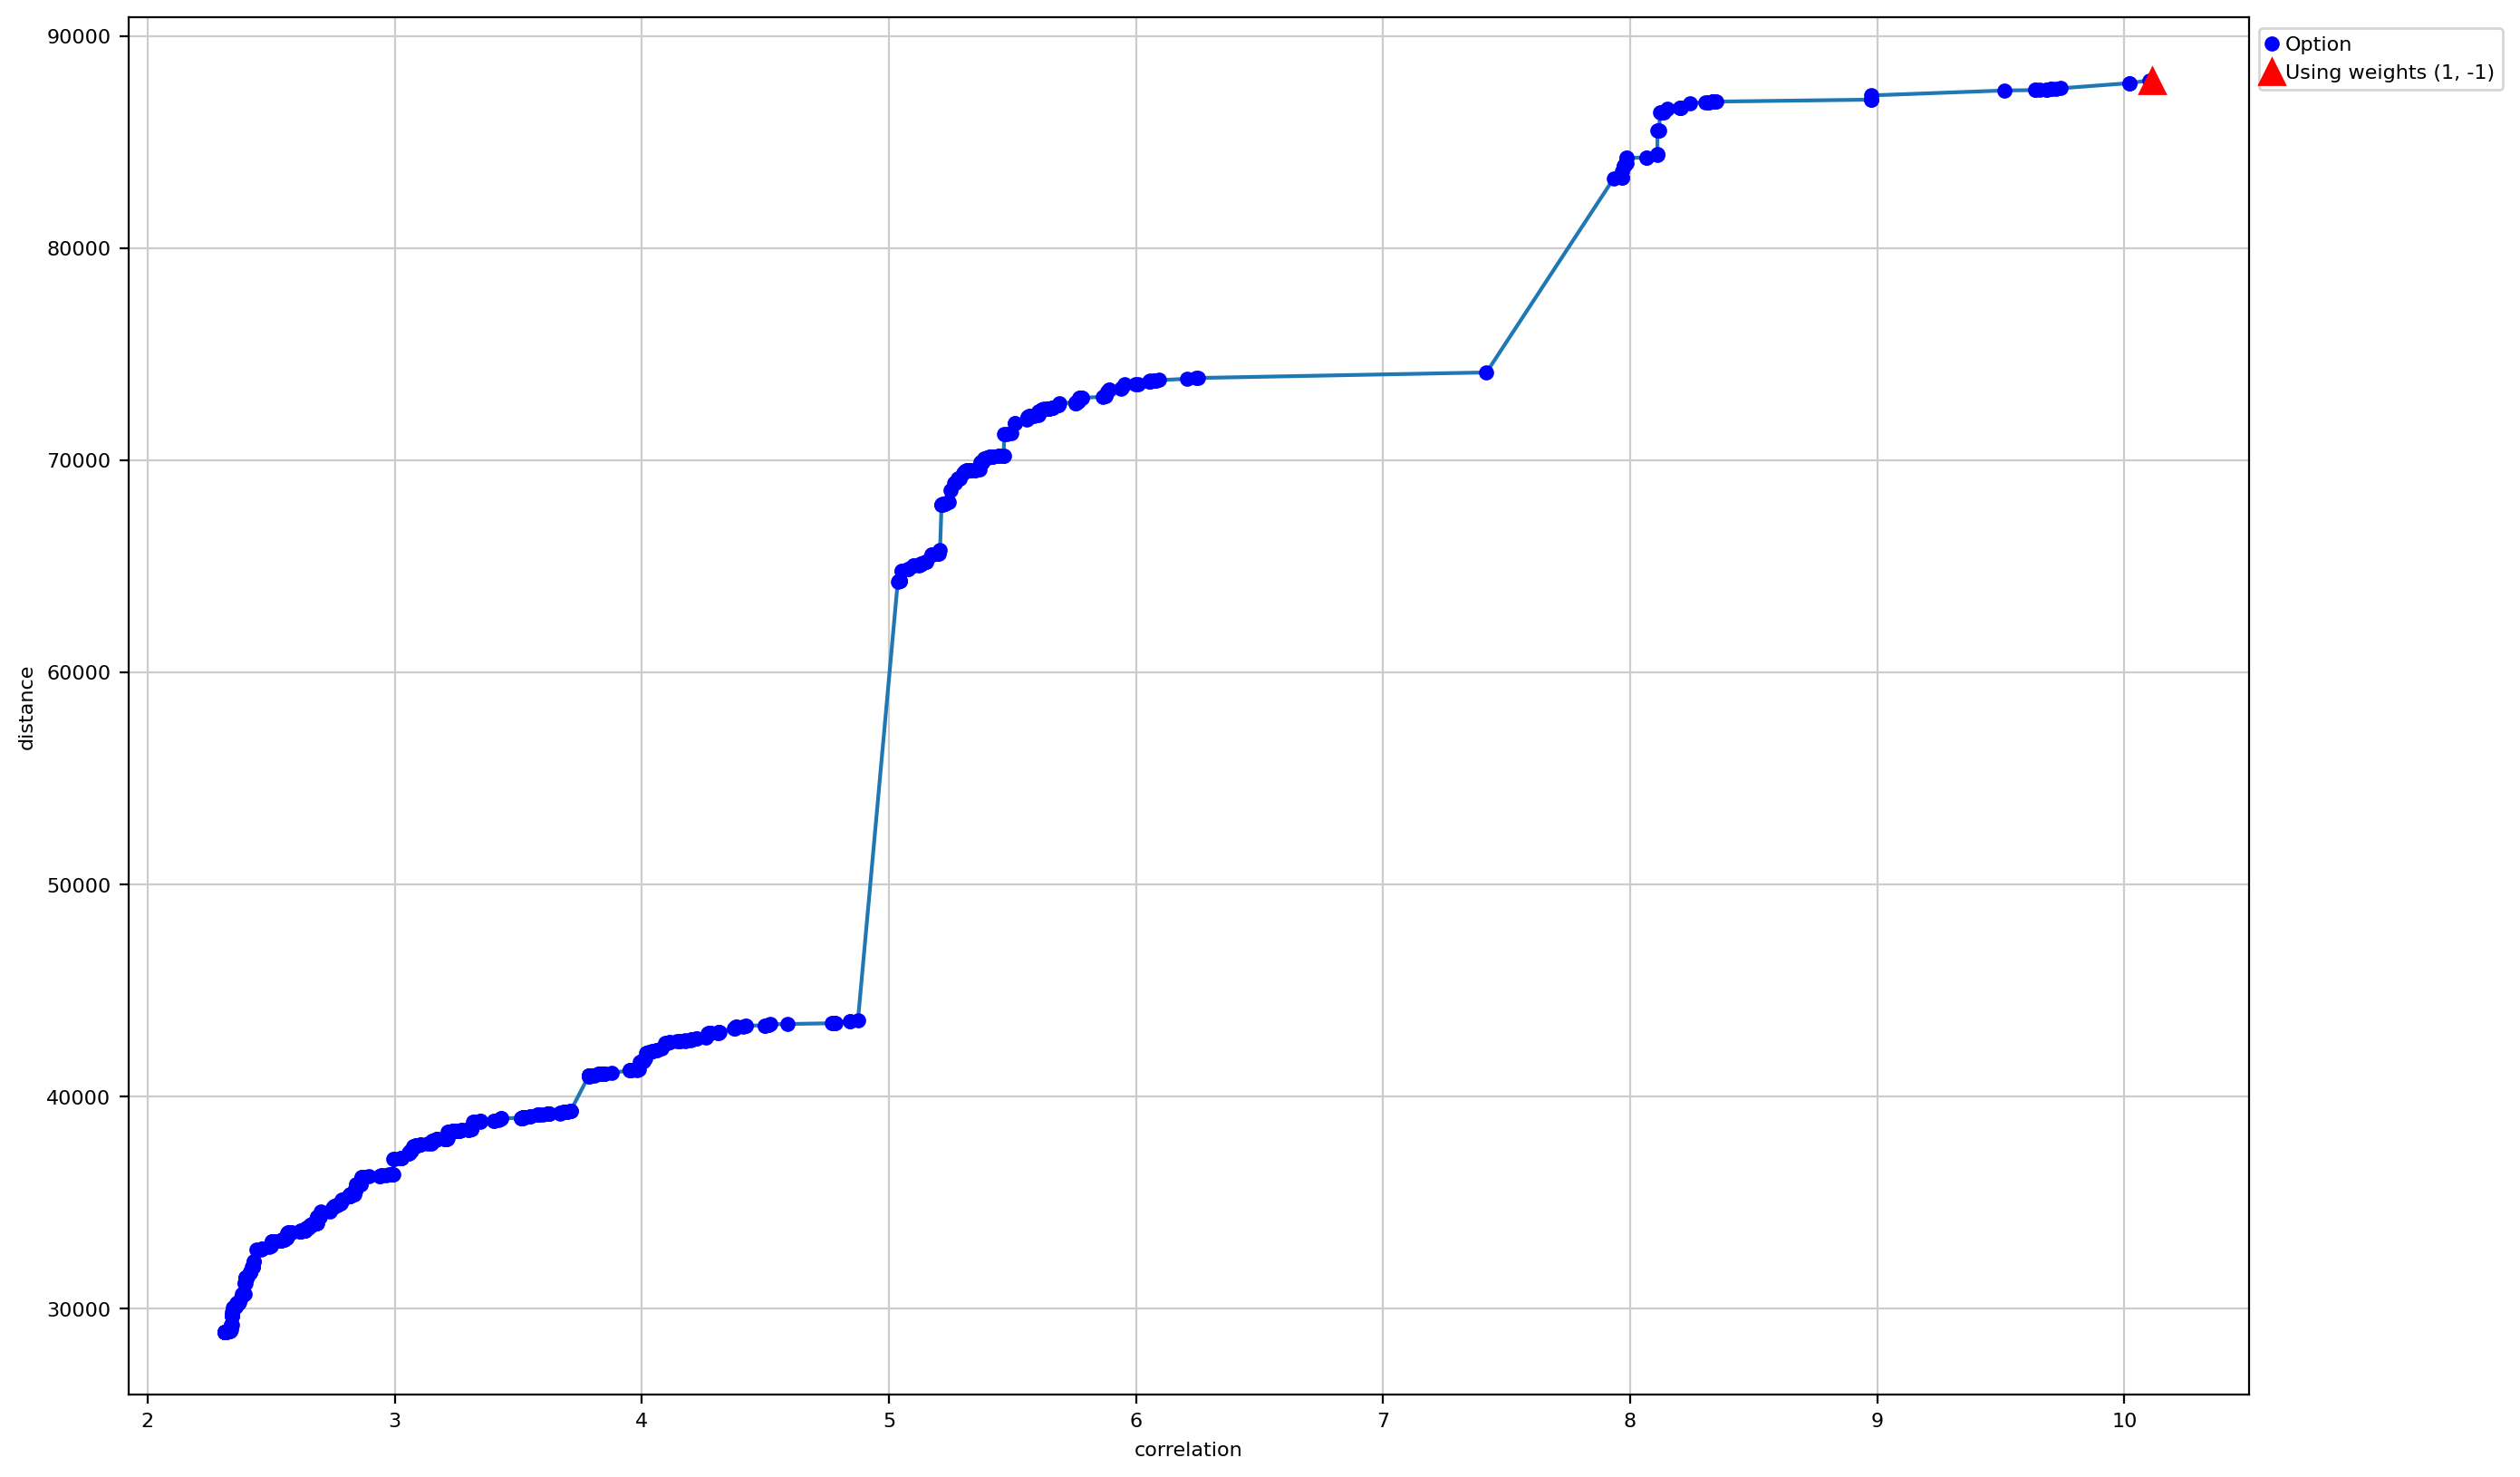

In [12]:
ag.plot(size='large',weights=(1,-1))

In [57]:
selection = ag.select(index=70)

In [58]:
import pandas as pd
centroids_sc_pareto = pd.DataFrame(centroids[:,selection].X.T,index=centroids[:,selection].var_names,columns=centroids[:,selection].obs_names)
centroids_sc_pareto.shape

(400, 12)

In [48]:
centroids_sc_pareto.to_csv('centroids_pareto_indrop_smartseq_20.csv')

In [49]:
#import pandas as pd
#centroids_sc_pareto = pd.read_csv('centroids_pareto_indrop_smartseq_0.csv',index_col=0)

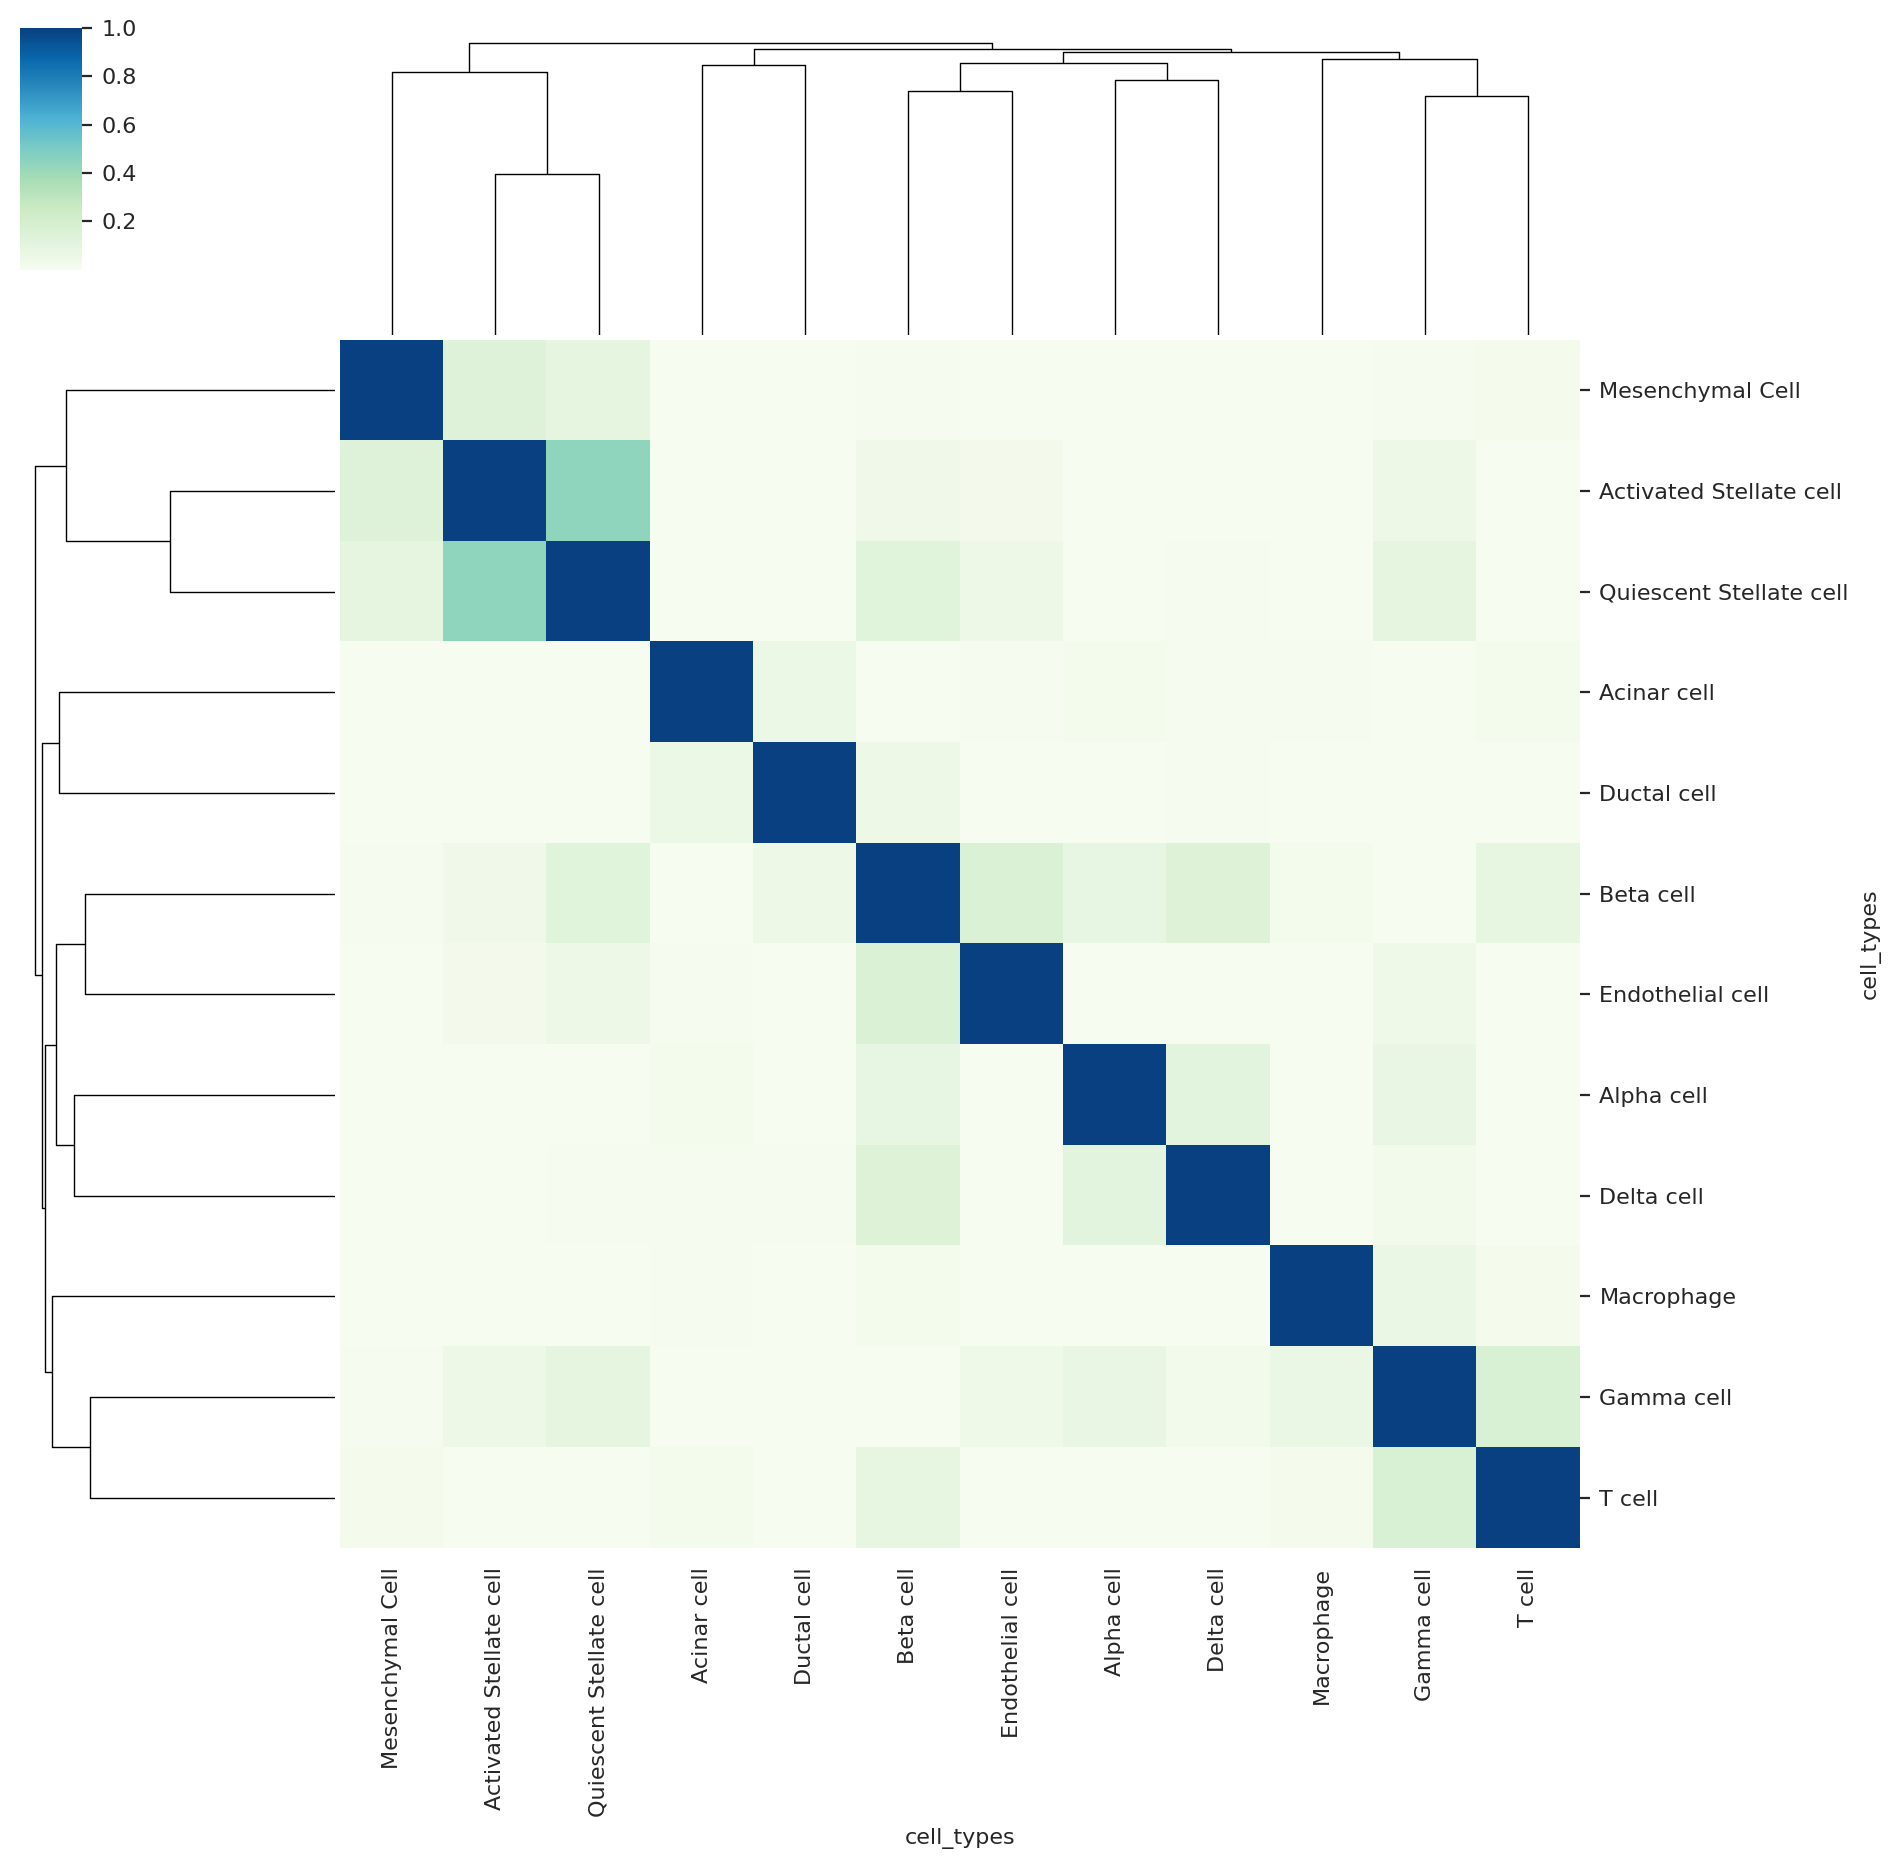

In [59]:
import seaborn as sns
import numpy as np
corr = pd.DataFrame(data = np.corrcoef(centroids_sc_pareto.T), columns = centroids_sc_pareto.columns, index = centroids_sc_pareto.columns)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns_plot =sns.clustermap(np.abs(corr),cmap=sns.color_palette("GnBu", 1000), robust=True)



TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


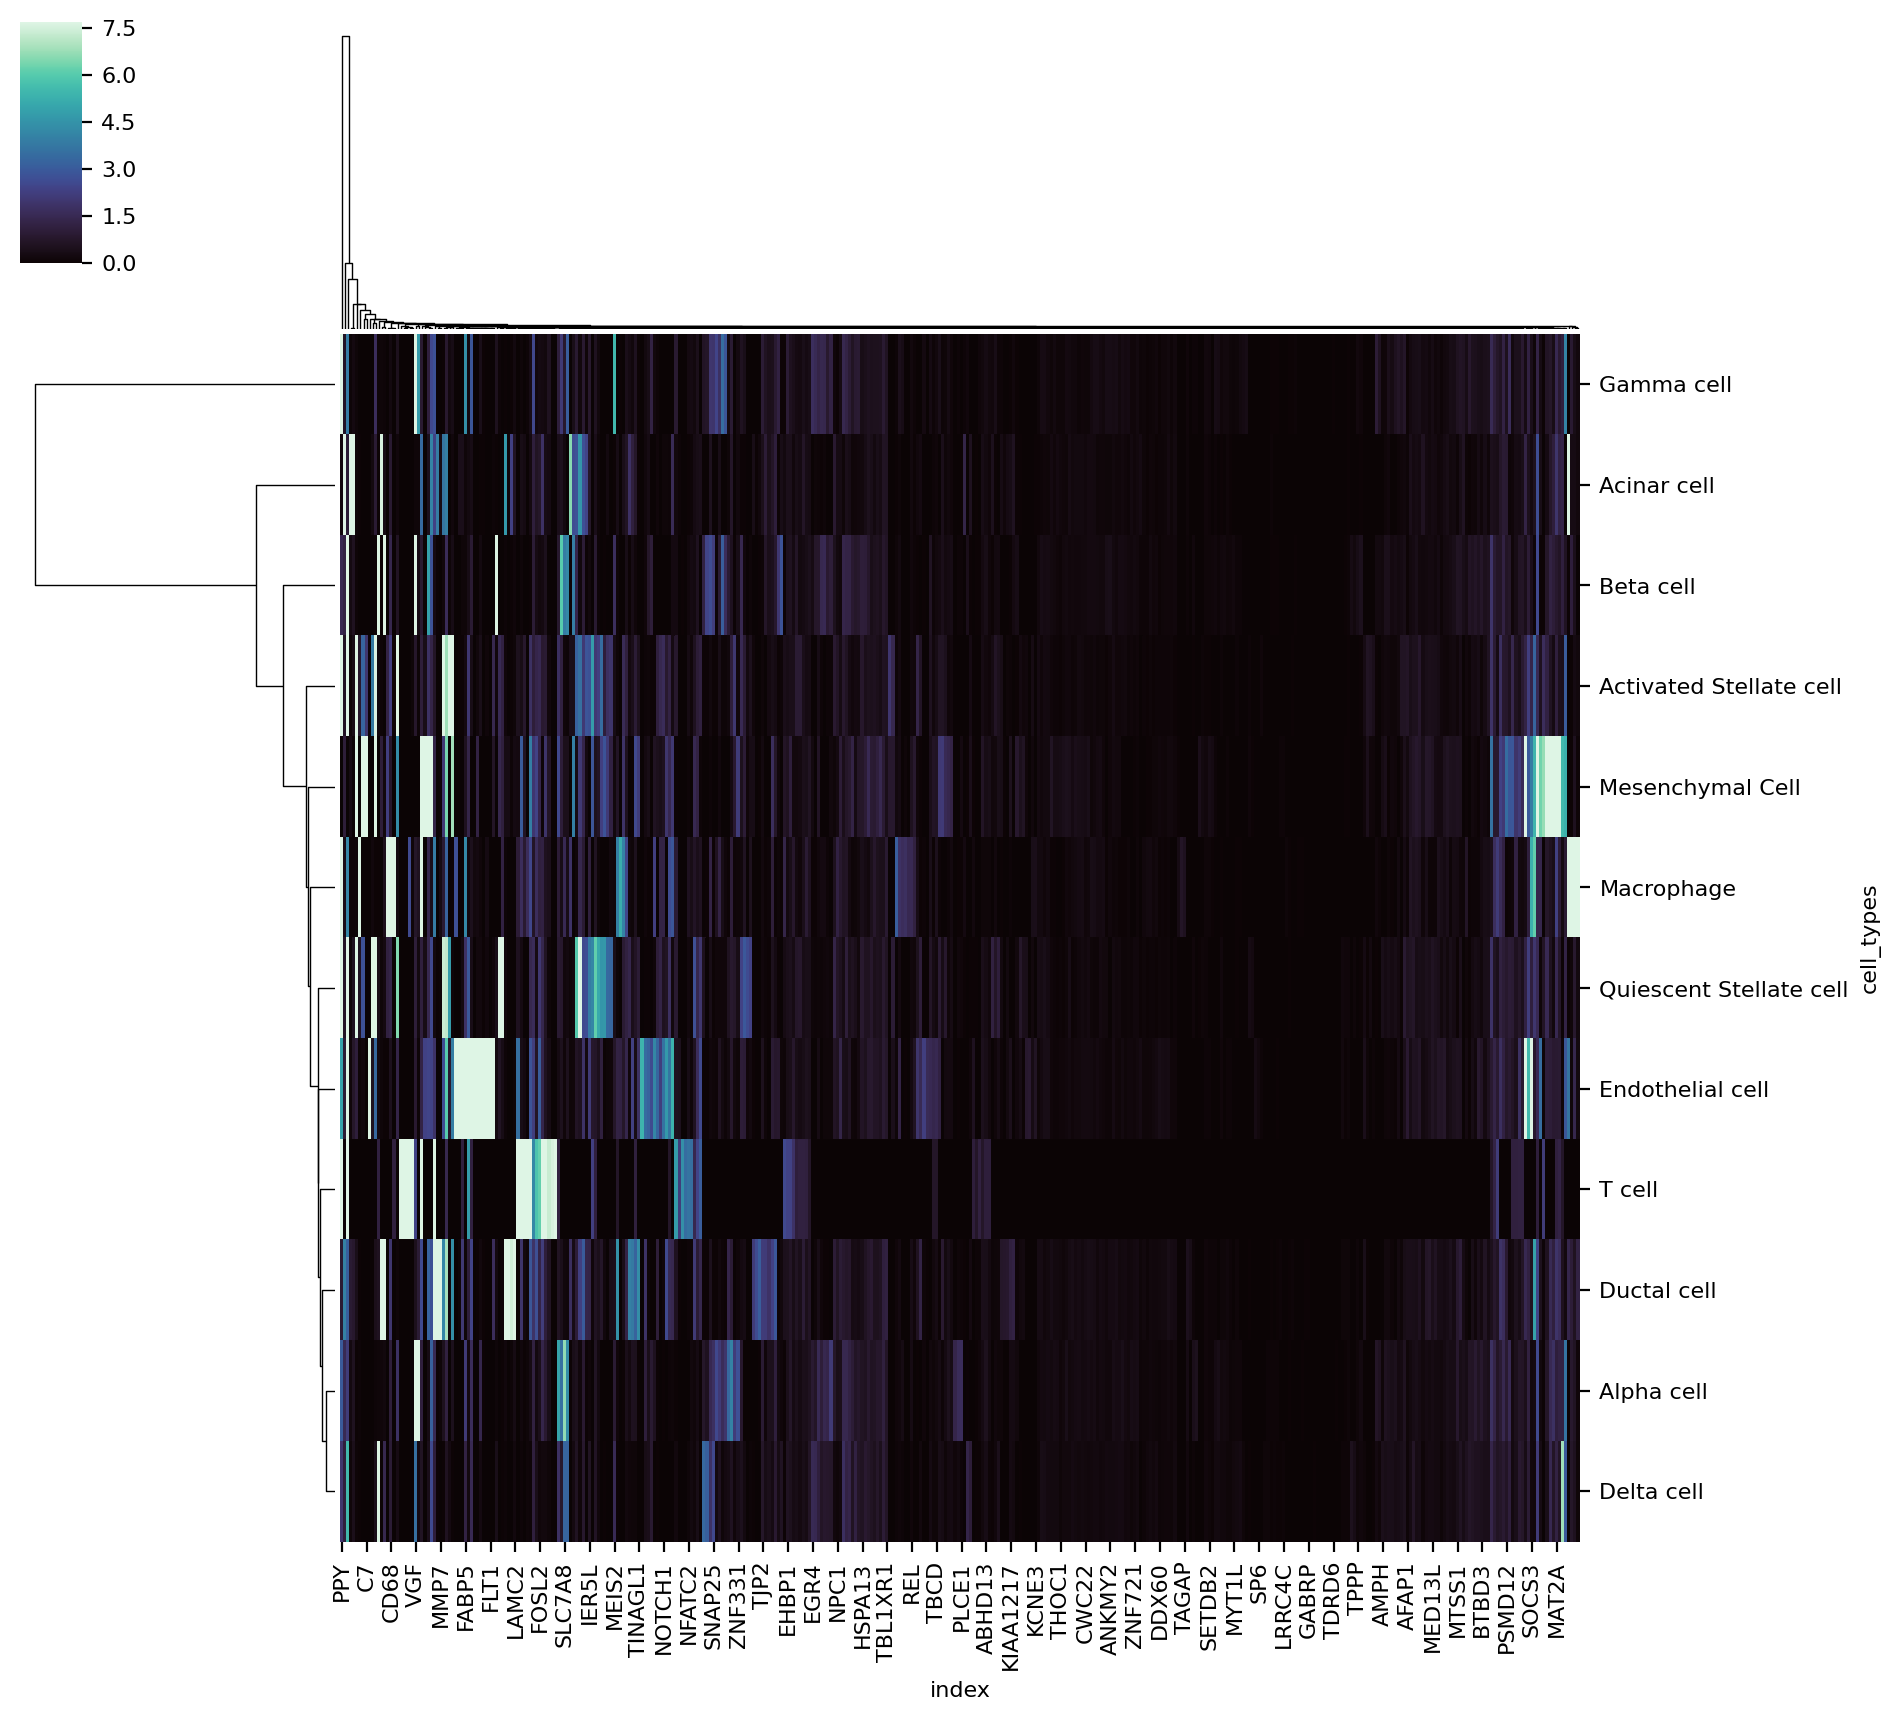

In [60]:
import seaborn as sns
subTypes = pd.DataFrame
subTypes = centroids_sc_pareto.columns
type_pal = sns.husl_palette(centroids_sc_pareto.columns.size, s=0.7)
lut = dict(zip(centroids_sc_pareto.columns.unique(), type_pal))
row_colors = subTypes.map(lut)
sns_plot = sns.clustermap(centroids_sc_pareto.T, cmap="mako", robust=True) #, cmap="mako", robust=True, row_cluster = False)


In [61]:
#adata_log.X = adata_log.X.todense()

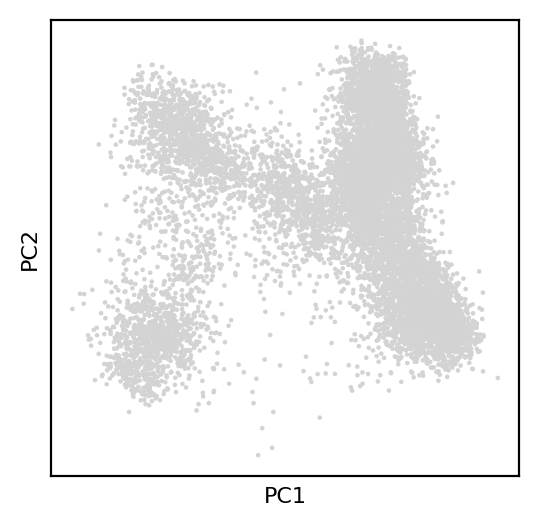

In [62]:
import scipy as sci

adata_pareto = adata_log[:,centroids_sc_pareto.index].copy()
adata_pareto = adata_pareto[adata.obs_names]
sc.tl.pca(adata_pareto)
adata_pareto.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_scatter(adata_pareto)
sc.pp.neighbors(adata_pareto, n_neighbors=20)
sc.tl.umap(adata_pareto)

In [63]:
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, dpi_save=300, vector_friendly=True)
params = {'legend.fontsize': 8,
          'figure.figsize': (3, 3),
         'axes.labelsize':8,
         'axes.titlesize':8,
         'xtick.labelsize':8,
         'ytick.labelsize':8}
plt.rcParams.update(params)

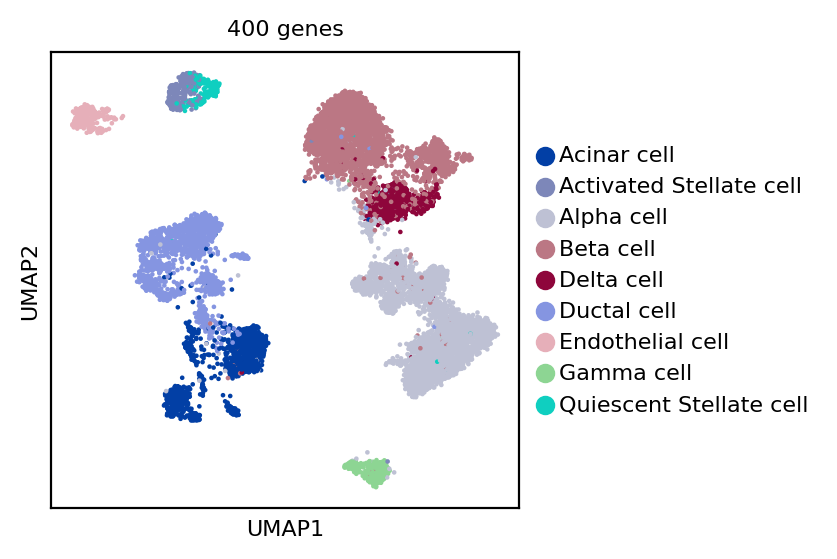

In [64]:
sc.pl.umap(adata_pareto, color='oncology',title='400 genes', save="_all_indrop_smartseq_400.pdf")

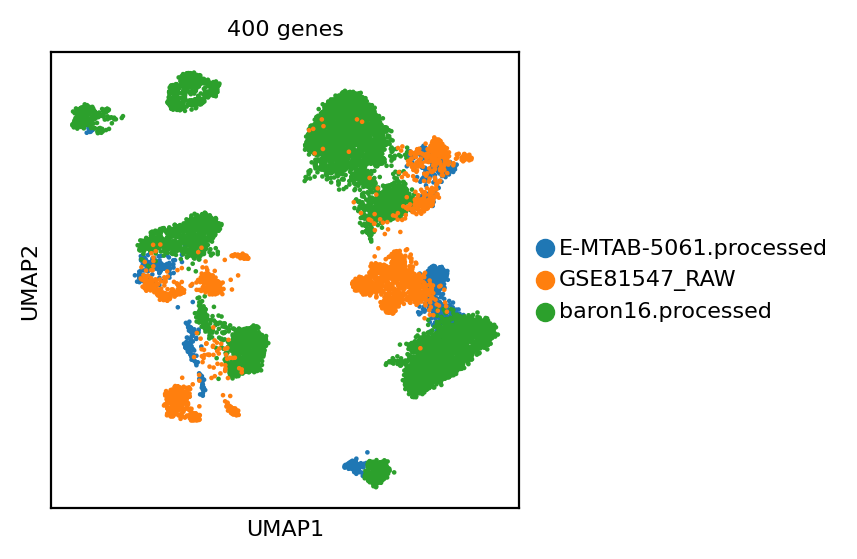

In [65]:
sc.pl.umap(adata_pareto, color='study',title='400 genes', save="_sample_all_indrop_smartseq_400.pdf")

/home/icb/hananeh.aliee/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1120: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning,


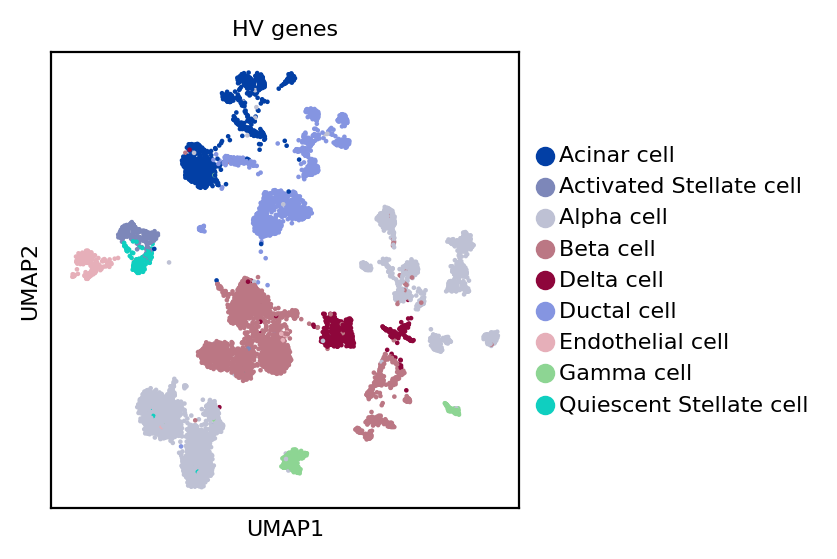

In [66]:
sc.pl.umap(adata_log[adata.obs_names], color='oncology', title = 'HV genes',save="_indrop_smartseq_hv.pdf")

/home/icb/hananeh.aliee/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1120: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning,


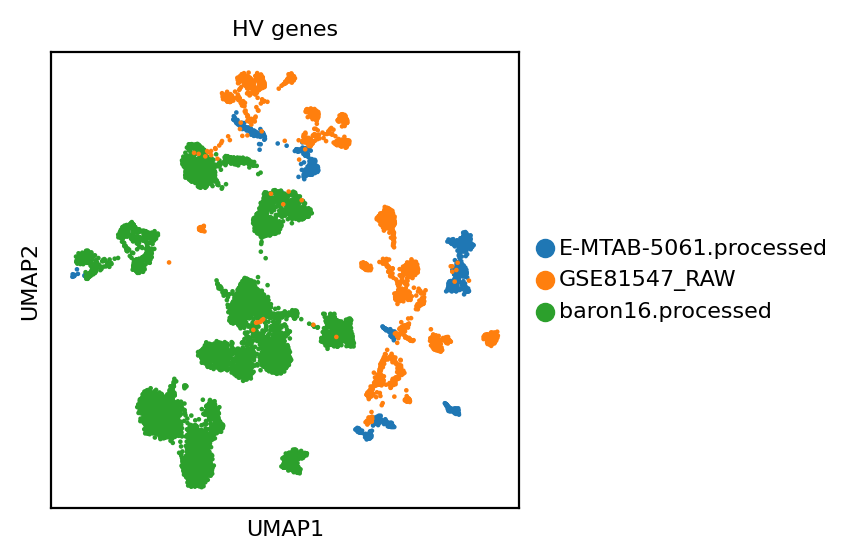

In [67]:
sc.pl.umap(adata_log[adata.obs_names], color='study', title = 'HV genes',save="_sample_indrop_smartseq_hv.pdf")

In [25]:
adata_pareto.obs['oncology'].value_counts()

Alpha cell                 3692
Beta cell                  2936
Ductal cell                1435
Acinar cell                1140
Delta cell                  677
Gamma cell                  319
Activated Stellate cell     253
Endothelial cell            250
Quiescent Stellate cell     163
Mesenchymal Cell             53
Macrophage                   32
T cell                        5
Name: oncology, dtype: int64

In [68]:
### Silhouette score
def silhouette(adata, group_key, metric='euclidean', embed='X_pca', scale=True):
    """
    wrapper for sklearn silhouette function values range from [-1, 1] with 1 being an ideal fit, 0 indicating overlapping clusters and -1 indicating misclassified cells
    """
    import sklearn.metrics as scm
    
    if embed not in adata.obsm.keys():
        print(adata.obsm.keys())
        raise KeyError(f'{embed} not in obsm')
    asw = scm.silhouette_score(adata.obsm[embed], adata.obs[group_key])
    if scale:
        asw = (asw + 1)/2
    return asw

def silhouette_batch(adata, batch_key, group_key, metric='euclidean', 
                     embed='X_pca', verbose=True, scale=True):
    """
    Silhouette score of batch labels subsetted for each group.
    params:
        batch_key: batches to be compared against
        group_key: group labels to be subsetted by e.g. cell type
        metric: see sklearn silhouette score
        embed: name of column in adata.obsm
    returns:
        all scores: absolute silhouette scores per group label
        group means: if `mean=True`
    """
    import sklearn.metrics as scm

    if embed not in adata.obsm.keys():
        print(adata.obsm.keys())
        raise KeyError(f'{embed} not in obsm')
    
    sil_all = pd.DataFrame(columns=['group', 'silhouette_score'])
    
    for group in adata.obs[group_key].unique():
        adata_group = adata[adata.obs[group_key] == group]
        if adata_group.obs[batch_key].nunique() == 1:
            continue
        sil_per_group = scm.silhouette_samples(adata_group.obsm[embed],
                                               adata_group.obs[batch_key],
                                               metric=metric)
        # take only absolute value
        sil_per_group = [abs(i) for i in sil_per_group]
        if scale:
            # scale s.t. highest number is optimal
            sil_per_group = [1 - i for i in sil_per_group]
        d = pd.DataFrame({'group' : [group]*len(sil_per_group), 'silhouette_score' : sil_per_group})
        sil_all = sil_all.append(d)    
    sil_all = sil_all.reset_index(drop=True)
    sil_means = sil_all.groupby('group').mean()
    
    if verbose:
        print(f'mean silhouette per cell: {sil_means}')
    return sil_all, sil_means

def plot_silhouette_score(adata_dict, batch_key, group_key, metric='euclidean', 
                     embed='X_pca', palette='Dark2', per_group=False, verbose=True):
    """
    params:
        adata_dict: dictionary of adata objects, each labeled by e.g. integration method name
    """
    
    with sns.color_palette(palette):
        for label, adata in adata_dict.items():
            checkAdata(adata)
            sil_scores = silhouette(adata, 
                                          batch_key=batch_key,
                                          group_key=group_key,
                                          metric=metric,
                                          embed=embed,
                                          means=False,
                                          verbose=verbose)
            sns.distplot(sil_scores['silhouette_score'], label=label, hist=False)
        plt.title('Silhouette scores per cell for all groups')
        plt.show()
        
        if per_group:
            for data_set, adata in adata_dict.items():
                sil_scores = silhouette(adata,
                                              batch_key=batch_key,
                                              group_key=group_key,
                                              metric=metric,
                                              embed=embed,
                                              means=False,
                                              verbose=verbose)
                # plot for all groups
                for group in sil_scores['group'].unique():
                    group_scores = sil_scores[sil_scores['group'] == group]
                    sns.distplot(group_scores['silhouette_score'], label=group, hist=False)
                plt.title(f'Silhouette scores per cell for {data_set}')
                plt.show()

In [163]:
u,m = silhouette_batch(adata_log,batch_key='study',group_key='oncology')

mean silhouette per cell:                   silhouette_score
group                             
Acinar cell               0.604478
Alpha cell                0.779375
Beta cell                 0.724053
Delta cell                0.751853
Ductal cell               0.792326
Endothelial cell          0.704505
Gamma cell                0.704701


In [164]:
u_p,m_p = silhouette_batch(adata_pareto,batch_key='study',group_key='oncology')

mean silhouette per cell:                   silhouette_score
group                             
Acinar cell               0.763916
Alpha cell                0.907317
Beta cell                 0.867451
Delta cell                0.908193
Ductal cell               0.872080
Endothelial cell          0.875946
Gamma cell                0.878192


In [102]:
m_p.T

group             Acinar cell  Alpha cell  Beta cell  Delta cell  Ductal cell  \
silhouette_score     0.763916    0.907317   0.867451    0.908193      0.87208   
method              AutoGeneS   AutoGeneS  AutoGeneS   AutoGeneS    AutoGeneS   
cell              Acinar cell  Alpha cell  Beta cell  Delta cell  Ductal cell   

group             Endothelial cell  Gamma cell  
silhouette_score          0.875946    0.878192  
method                   AutoGeneS   AutoGeneS  
cell              Endothelial cell  Gamma cell

In [131]:
#pd.DataFrame(adata.X.T,columns=adata.obs['oncology'],index=adata.var_names).to_csv(write_folder+'cibersort_pancreas_healthy.csv',sep="\t")

In [7]:
cibersort_sig = pd.read_csv(write_folder+'Cibersort_pancreas_healthy_sig.txt',sep='\t',index_col=0)

NameError: name 'pd' is not defined

In [139]:
cibersort_sig.shape

(3203, 9)

In [140]:
adata_cibersort = adata[:,cibersort_sig.index].copy()

In [144]:
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, dpi_save=300, vector_friendly=True)
params = {'legend.fontsize': 8,
          'figure.figsize': (3, 3),
         'axes.labelsize':8,
         'axes.titlesize':8,
         'xtick.labelsize':8,
         'ytick.labelsize':8}
plt.rcParams.update(params)

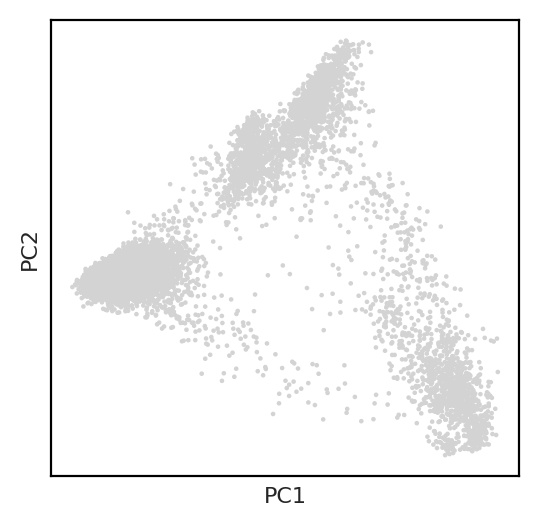

In [145]:
adata_cibersort = adata_log[:,cibersort_sig.index].copy()
sc.tl.pca(adata_cibersort)
adata_pareto.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_scatter(adata_cibersort)
sc.pp.neighbors(adata_cibersort, n_neighbors=20)
sc.tl.umap(adata_cibersort)

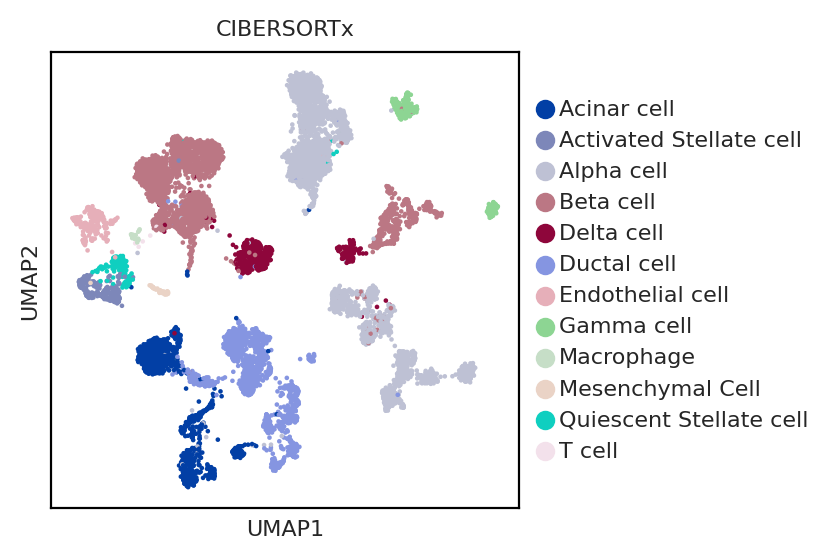

In [146]:
sc.pl.umap(adata_cibersort,color='oncology',title='CIBERSORTx', save="_all_indrop_smartseq_cibersort.pdf")

In [6]:
adata_cibersort

NameError: name 'adata_cibersort' is not defined

In [147]:
u_c,m_c = silhouette_batch(adata_cibersort,batch_key='study',group_key='oncology')

mean silhouette per cell:                   silhouette_score
group                             
Acinar cell               0.591464
Alpha cell                0.831485
Beta cell                 0.807655
Delta cell                0.817108
Ductal cell               0.821490
Endothelial cell          0.875283
Gamma cell                0.762734


In [172]:
sc.tl.rank_genes_groups(adata_log, groupby='oncology', key_added='rank_genes')
mg = []
clusters = set(adata_log.obs['oncology'])
markers = pd.DataFrame(columns = clusters)
test = pd.DataFrame()
list_mg = []
for clust in clusters:
    mg = adata_log.uns['rank_genes']['names'][clust][:40]
    score = adata_log.uns['rank_genes']['scores'][clust][:40]
    logfc = adata_log.uns['rank_genes']['logfoldchanges'][clust][:40]
    pval = adata_log.uns['rank_genes']['pvals'][clust][:40]
    qval = adata_log.uns['rank_genes']['pvals_adj'][clust][:40]
    list_mg.extend(mg)
    markers.loc[:,clust] = mg
    i=0
    for g in mg:
        pt = pd.Series([clust,mg[i],score[i],logfc[i],pval[i],qval[i]],['cluster','gene','logFC','score','pvalue','pvalue_adj'])
        test = test.append([pt], ignore_index=True)
        i=i+1
        if i>1000:
            break
#test.to_csv(results_file+"rank_genes_KO_Het.csv")



In [173]:
len(set(list_mg))

397

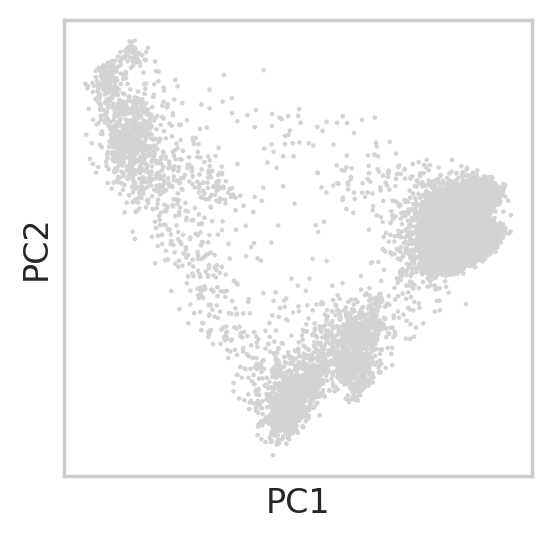

In [174]:
adata_mg = adata_log[:,list(set(list_mg))].copy()
sc.tl.pca(adata_mg)
adata_mg.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_scatter(adata_mg)
sc.pp.neighbors(adata_mg, n_neighbors=20)
sc.tl.umap(adata_mg)

In [183]:
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, dpi_save=300, vector_friendly=True)
params = {'legend.fontsize': 8,
          'figure.figsize': (3, 3),
         'axes.labelsize':8,
         'axes.titlesize':8,
         'xtick.labelsize':8,
         'ytick.labelsize':8}
plt.rcParams.update(params)

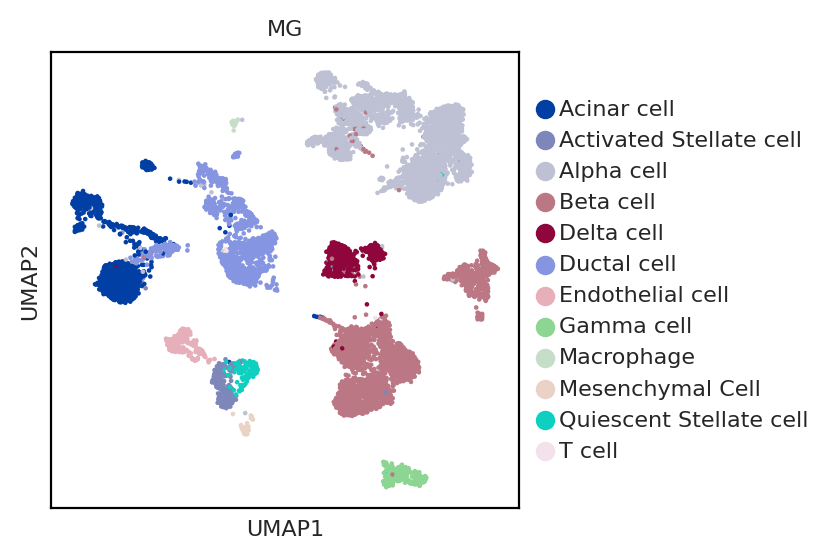

In [184]:
sc.pl.umap(adata_mg,color='oncology',title='MG', save="_all_indrop_smartseq_MG.pdf")

In [177]:
u_mg,m_mg = silhouette_batch(adata_mg,batch_key='study',group_key='oncology')

mean silhouette per cell:                   silhouette_score
group                             
Acinar cell               0.699739
Alpha cell                0.904332
Beta cell                 0.900519
Delta cell                0.912863
Ductal cell               0.883757
Endothelial cell          0.911971
Gamma cell                0.877648


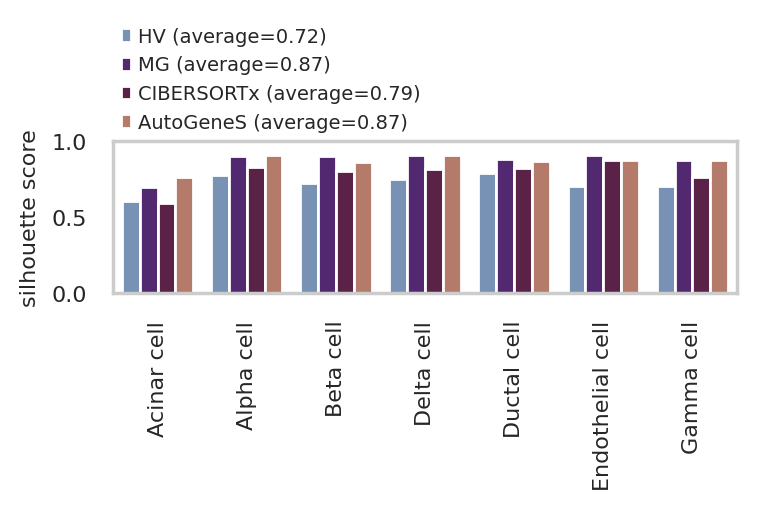

In [188]:
import seaborn as sns, matplotlib.pyplot as plt

sns.set(style="whitegrid")

m.loc[:,'method'] = 'HV (average='+str(round(np.mean(m)[0],2))+')'
m_mg.loc[:,'method'] = 'MG (average='+str(round(np.mean(m_mg)[0],2))+')'
m_p.loc[:,'method'] = 'AutoGeneS (average='+str(round(np.mean(m_p)[0],2))+')'
m_c.loc[:,'method'] = 'CIBERSORTx (average='+str(round(np.mean(m_c)[0],2))+')'


m.loc[:,'cell'] =  m.index
m_p.loc[:,'cell'] = m_p.index
m_c.loc[:,'cell'] = m_c.index
m_mg.loc[:,'cell'] = m_mg.index

m_p.loc[:,'silhouette_score']  = m_p.loc[:,'silhouette_score'].astype(float)
m.loc[:,'silhouette_score']  = m.loc[:,'silhouette_score'].astype(float)
m_c.loc[:,'silhouette_score']  = m_c.loc[:,'silhouette_score'].astype(float)
m_mg.loc[:,'silhouette_score']  = m_mg.loc[:,'silhouette_score'].astype(float)



methods = pd.concat([m.T,m_mg.T,m_c.T,m_p.T],axis=1).T
tips = methods

fig, ax = plt.subplots(figsize=(4, 1))
#sns.set_style("whitegrid", {'axes.grid' : False})
#plt.figure(figsize=(5,5))
with sns.axes_style("whitegrid"):
    sns.barplot(x="cell", y="silhouette_score", hue="method", data=tips,palette="twilight")
    #sns.swarmplot(x="sample", y="secretory cell", hue="method", data=tips, color="0", alpha=.95)
    def change_width(ax, new_value) :
        for patch in ax.patches :
            current_width = patch.get_width()
            diff = current_width - new_value

            # we change the bar width
            patch.set_width(new_value)

            # we recenter the bar
            patch.set_x(patch.get_x() + diff * .5)

    change_width(ax, .20)



plt.xlabel("")
#plt.title("p-value="+str(round(p,3)))
plt.ylabel("silhouette score",fontsize=8)
#plt.axis('off')
ax.grid(False)
plt.legend(fontsize=6)
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=1,
            borderaxespad=0, frameon=False,fontsize=7)
plt.xticks(rotation='vertical',fontsize=8)
plt.yticks(fontsize=8)
# Turns off grid on the secondary (right) Axis.

#ax.right_ax(False)
#plt.grid()
plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.savefig('silhouette_indrop_smartseq.pdf')  
plt.show()